In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from pandas.tseries.offsets import DateOffset

In [57]:
data_file = pd.read_excel('AMZ Forecast Project Data.xlsx', sheet_name='Sheet4')
data_file

,Year,11461,83019,97696,105324,193895,194533,232240,292859,300838,Start Date,End Date
0,2023,20,19,4,2,2,4,4,1,5,10/30/2023,11/5/2023
1,2023,14,11,7,1,2,3,1,0,6,10/23/2023,10/29/2023
2,2023,15,14,1,3,1,12,1,0,3,10/16/2023,10/22/2023
3,2023,53,41,5,0,1,23,0,0,11,10/9/2023,10/15/2023
4,2023,8,16,4,1,4,6,1,0,9,10/2/2023,10/8/2023
...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021,1,0,12,4,5,0,1,9,0,9/6/2021,9/12/2021
113,2021,1,0,7,1,2,0,0,3,0,8/30/2021,9/5/2021
114,2021,1,0,6,2,2,0,1,9,0,8/23/2021,8/29/2021
115,2021,1,0,6,1,1,0,1,4,0,8/16/2021,8/22/2021


In [58]:
data_file['Start Date']= pd.to_datetime(data_file['Start Date'])
data_file['End Date']= pd.to_datetime(data_file['End Date'])

In [59]:
data_file['End Date']= pd.to_datetime(data_file['End Date'])

Text(0, 0.5, 'Unit Sales')

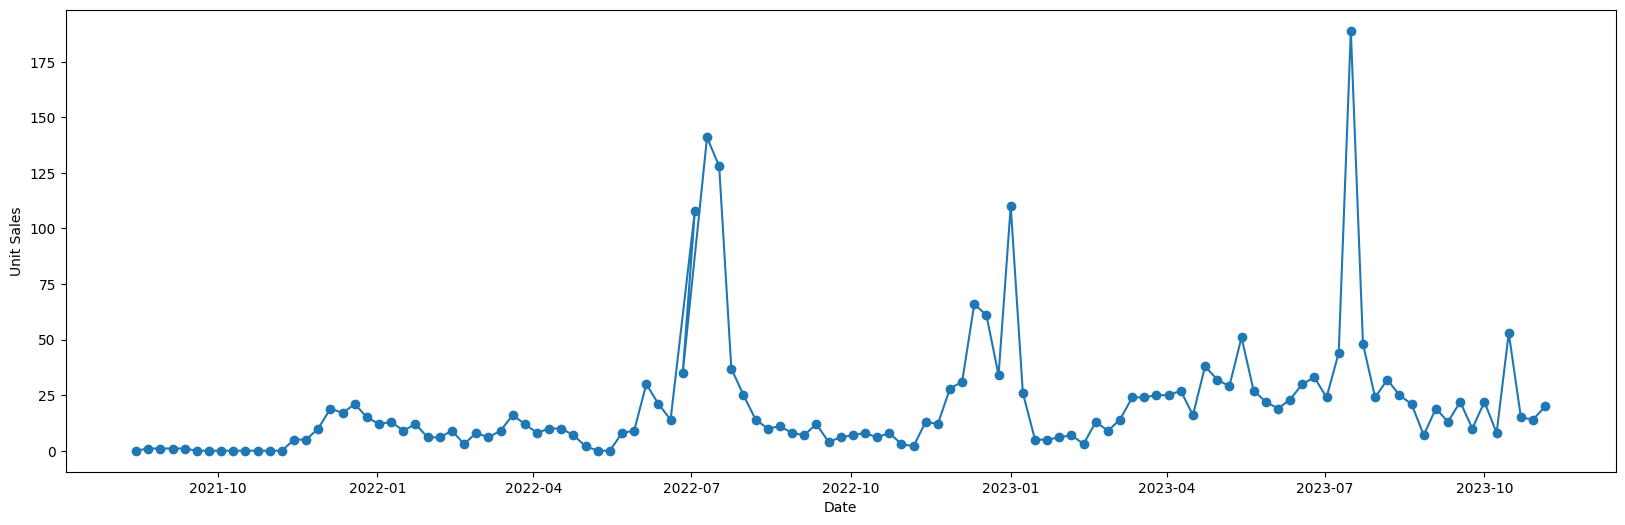

In [60]:
plt.figure(figsize=(20, 6))  # Adjust the figure size if needed
plt.plot(data_file['End Date'], data_file[11461], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Unit Sales')

Text(0, 0.5, 'Unit Sales')

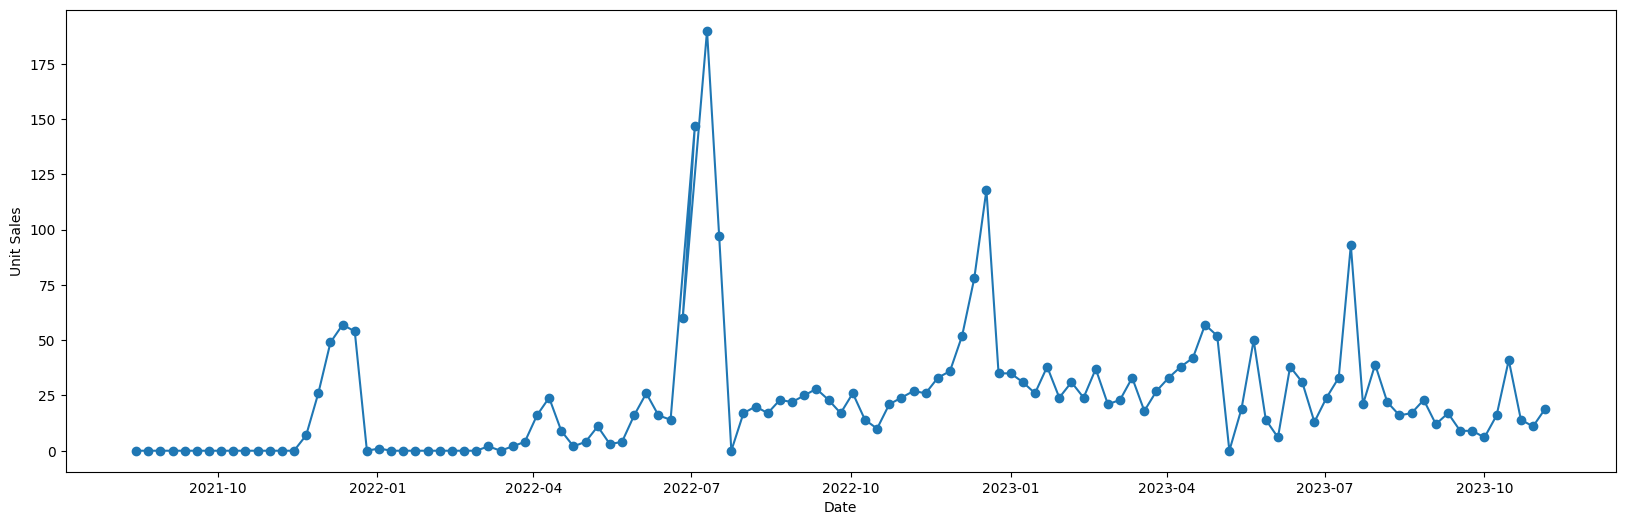

In [61]:
plt.figure(figsize=(20, 6))  # Adjust the figure size if needed
plt.plot(data_file['End Date'], data_file[83019], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Unit Sales')

Text(0, 0.5, 'Unit Sales')

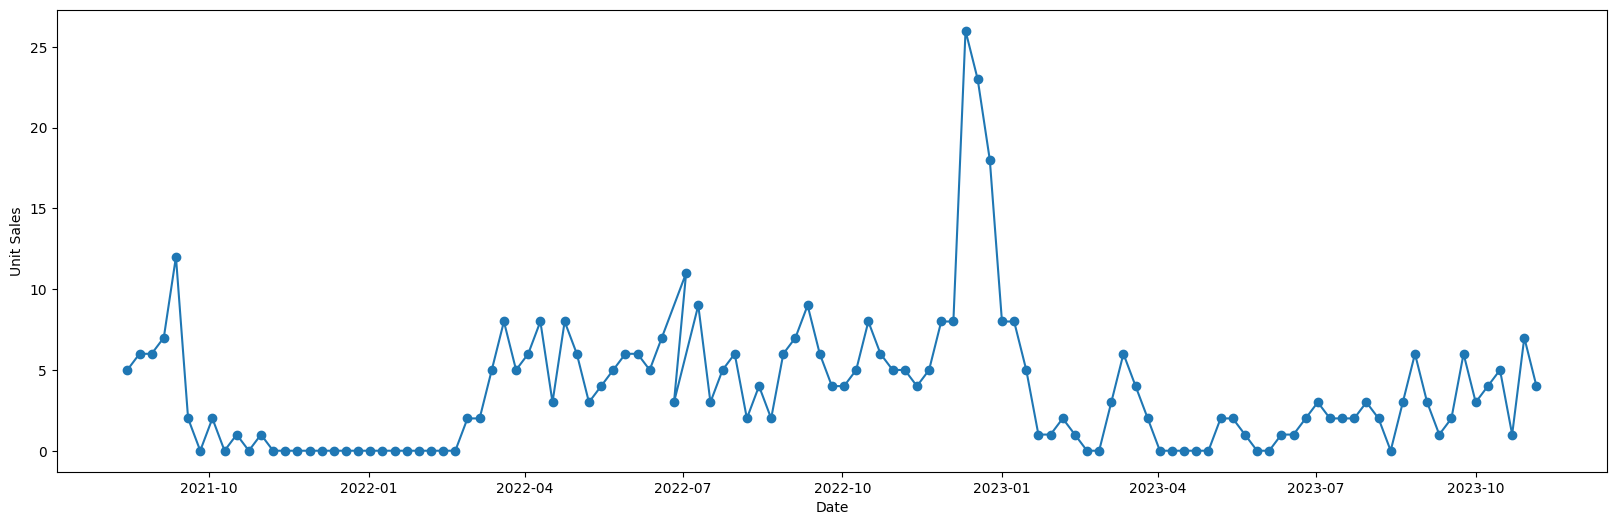

In [62]:
plt.figure(figsize=(20, 6))  # Adjust the figure size if needed
plt.plot(data_file['End Date'], data_file[97696], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Unit Sales')

Text(0, 0.5, 'Unit Sales')

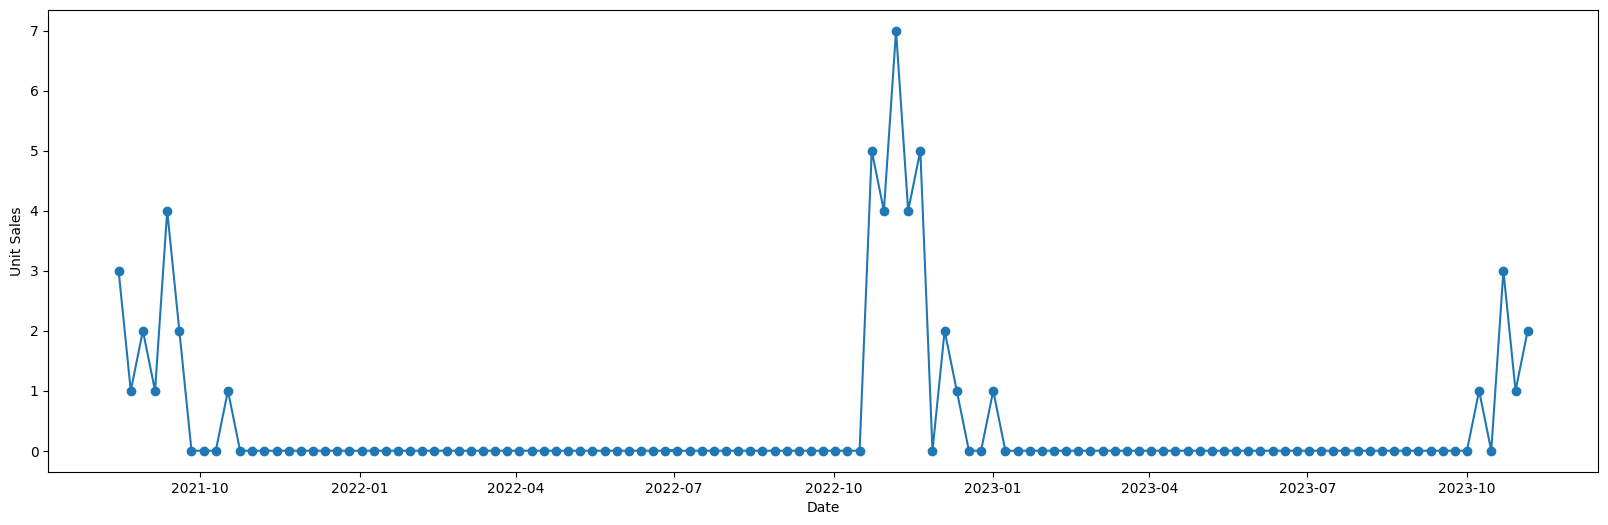

In [63]:
plt.figure(figsize=(20, 6))  # Adjust the figure size if needed
plt.plot(data_file['End Date'], data_file[105324], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Unit Sales')

Text(0, 0.5, 'Unit Sales')

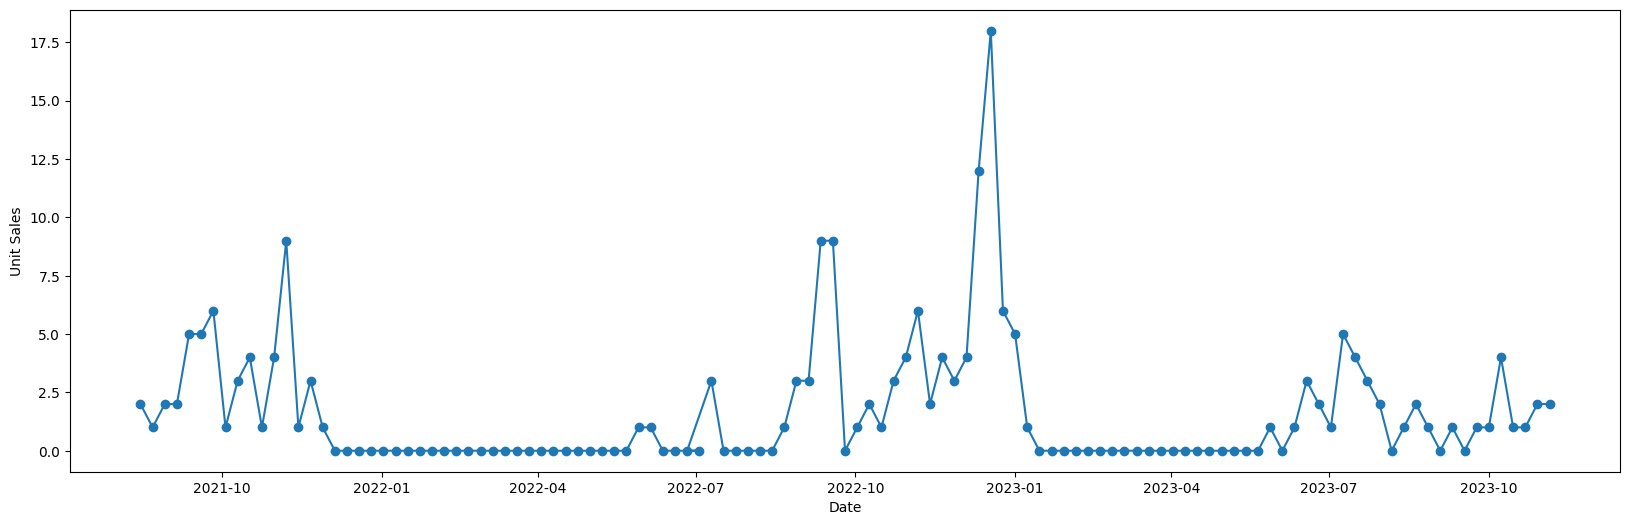

In [64]:
plt.figure(figsize=(20, 6))  # Adjust the figure size if needed
plt.plot(data_file['End Date'], data_file[193895], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Unit Sales')

Text(0, 0.5, 'Unit Sales')

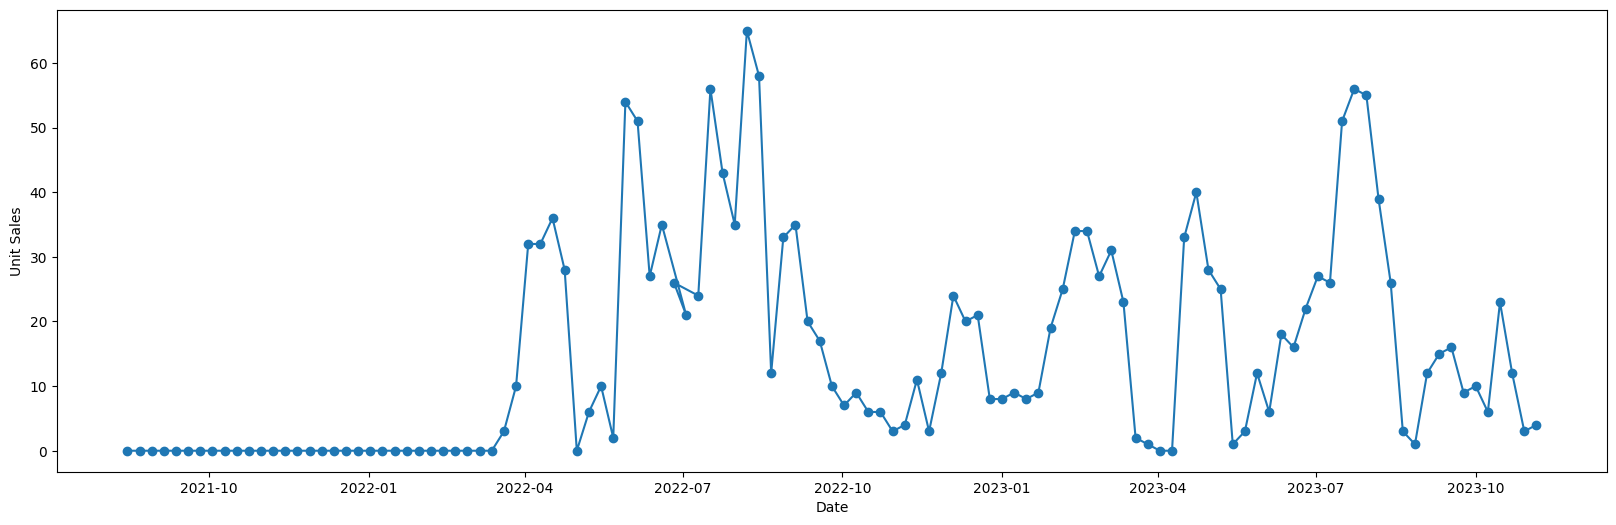

In [65]:
plt.figure(figsize=(20, 6))  # Adjust the figure size if needed
plt.plot(data_file['End Date'], data_file[194533], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Unit Sales')

Text(0, 0.5, 'Unit Sales')

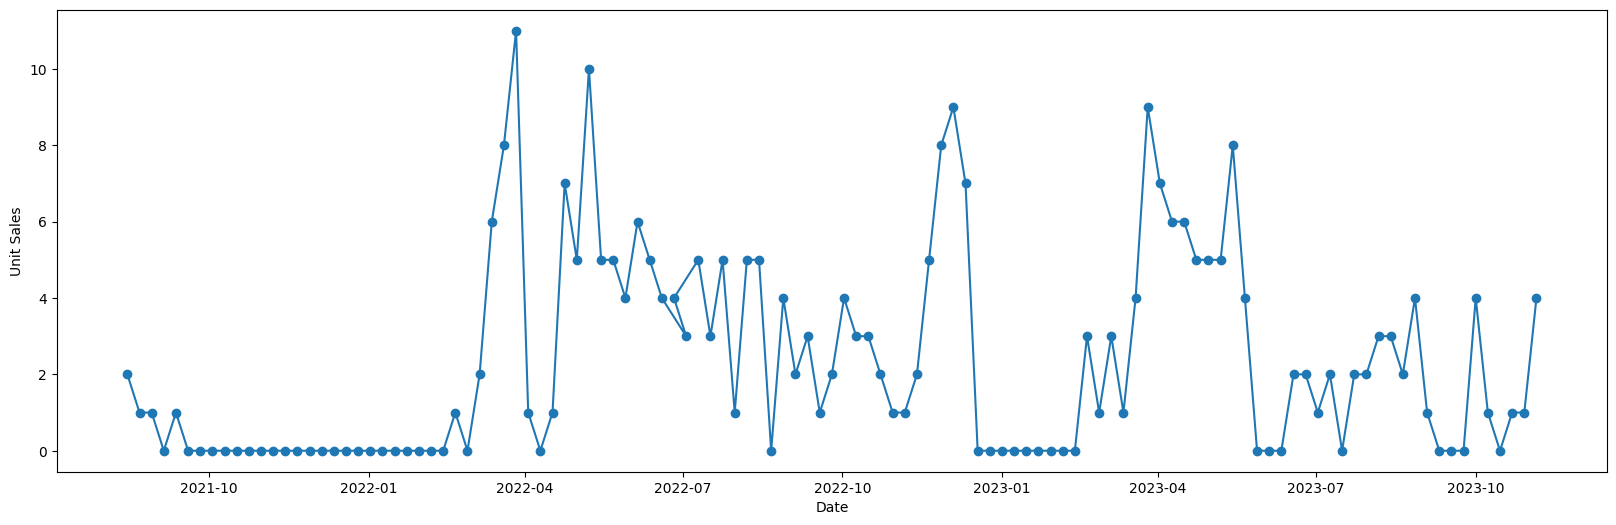

In [66]:
plt.figure(figsize=(20, 6))  # Adjust the figure size if needed
plt.plot(data_file['End Date'], data_file[232240], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Unit Sales')

Text(0, 0.5, 'Unit Sales')

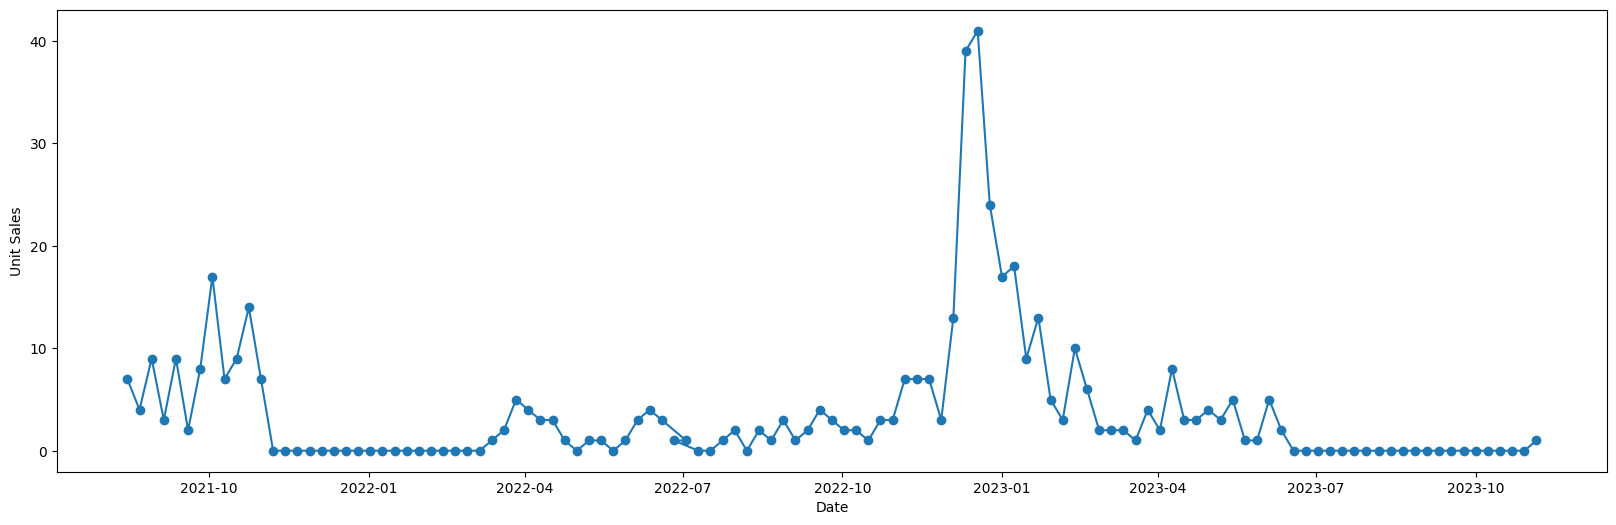

In [67]:
plt.figure(figsize=(20, 6))  # Adjust the figure size if needed
plt.plot(data_file['End Date'], data_file[292859], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Unit Sales')

Text(0, 0.5, 'Unit Sales')

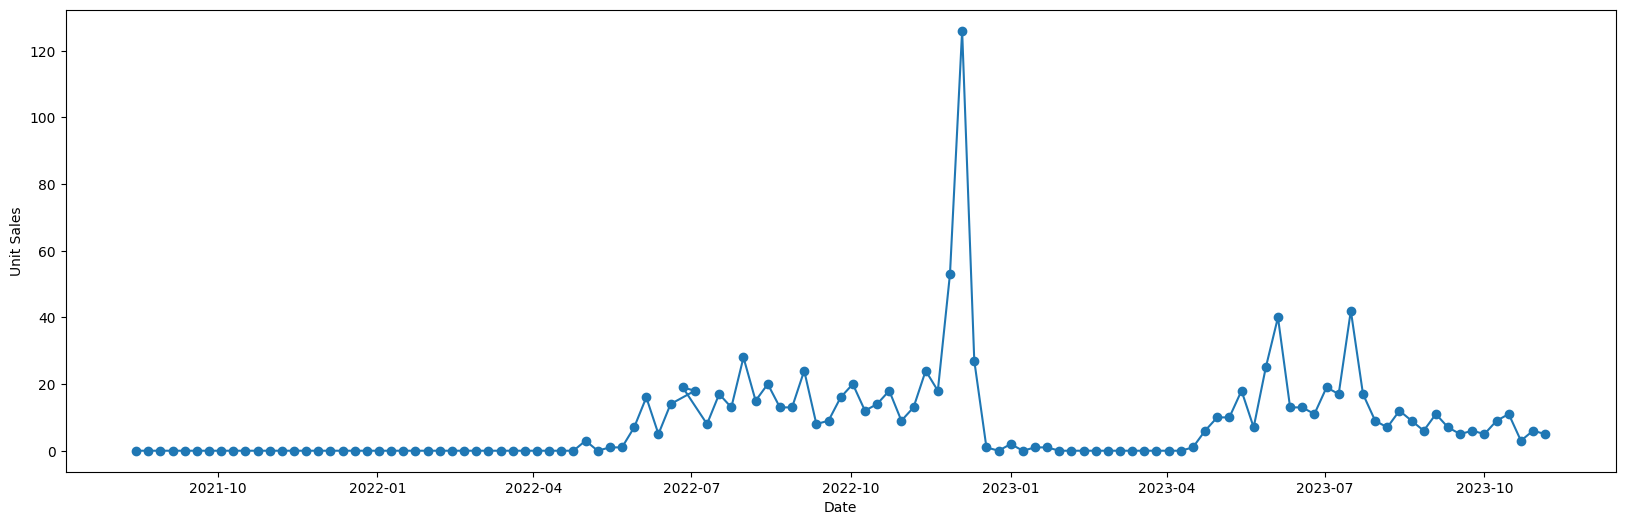

In [68]:
plt.figure(figsize=(20, 6))  # Adjust the figure size if needed
plt.plot(data_file['End Date'], data_file[300838], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Unit Sales')

In [69]:
#train = data_file[data_file.Start Date < pd.to_datetime("2023/09/03", format='%Y-%m-%d')]
#test = data_file[data_file.End Date > pd.to_datetime("2023/09/03", format='%Y-%m-%d')]

#plt.figure(figsize=(20, 6))
#plt.plot(train['End Date'], train[11461], color = "black")
#plt.plot(test['Start Date'], test[11461], color = "red")
#plt.ylabel('Unit Sales')
#plt.xlabel('Date')
#plt.xticks(rotation=45)
#plt.title("Train/Test split for Unit Sales Data")
#plt.show()

In [70]:
df = data_file[['End Date',11461]]
df

,End Date,11461
0,2023-11-05,20
1,2023-10-29,14
2,2023-10-22,15
3,2023-10-15,53
4,2023-10-08,8
...,...,...
112,2021-09-12,1
113,2021-09-05,1
114,2021-08-29,1
115,2021-08-22,1


In [71]:
# Assuming df is your DataFrame with 'end_date' and '11461' columns
df['End Date'] = pd.to_datetime(df['End Date'])
last_date = df['End Date'].max()

future_dates = [last_date + DateOffset(weeks=x) for x in range(0, 12)]
future_dates = pd.DataFrame(future_dates)
future_dates.columns = ['ds']
future_dates

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/2863507692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['End Date'] = pd.to_datetime(df['End Date'])


,ds
0,2023-11-05
1,2023-11-12
2,2023-11-19
3,2023-11-26
4,2023-12-03
5,2023-12-10
6,2023-12-17
7,2023-12-24
8,2023-12-31
9,2024-01-07


In [72]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/737281706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/737281706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)


In [73]:
df

,ds,y
0,2023-11-05,20
1,2023-10-29,14
2,2023-10-22,15
3,2023-10-15,53
4,2023-10-08,8
...,...,...
112,2021-09-12,1
113,2021-09-05,1
114,2021-08-29,1
115,2021-08-22,1


In [74]:
model.fit(df)
df = df.set_index('ds')

19:33:43 - cmdstanpy - INFO - Chain [1] start processing


19:33:43 - cmdstanpy - INFO - Chain [1] done processing


In [75]:
arima_forecast = pd.read_excel('forcasting_arima_NEW (1).xlsx', sheet_name='Sheet1')
arima_forecast

,Date,SKU 11461,SKU 83019,SKU 97696,SKU 105324,SKU 193895,SKU 194533,SKU 232240,SKU 292859,SKU 300838
0,2023-11-06,16.59,24.835757,3.903476,0.547037,1.915693,0.568037,2.977812,1.793305,5.605230
1,2023-11-13,20.47,24.172722,4.123106,1.429352,2.312286,4.449887,2.950444,2.016559,6.630995
2,2023-11-20,18.26,21.930740,3.849517,0.485632,1.818616,10.716584,2.324246,2.432798,7.295380
3,2023-11-27,20.84,22.632914,3.872496,1.074749,1.413755,11.650923,2.298183,2.632431,6.934133
4,2023-12-04,19.41,23.747708,3.836819,0.424817,1.883765,11.032914,2.367463,2.894879,7.487901
5,2023-12-11,21.06,23.307616,3.830827,0.820840,1.883183,13.211932,2.369249,3.028138,7.458805
6,2023-12-18,20.10,22.813804,3.821497,0.376102,1.412966,14.263832,2.357687,3.196726,7.586800
7,2023-12-25,21.12,23.098302,3.816856,0.644997,1.634628,13.351602,2.354227,3.285192,7.702098
8,2024-01-01,20.46,23.320267,3.813186,0.343260,1.909625,13.693216,2.353116,3.393596,7.733158
9,2024-01-08,21.06,23.155751,3.810853,0.528244,1.556254,14.560530,2.351498,3.452223,7.807269


In [153]:
df = data_file[['End Date',11461]]

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
19:52:33 - cmdstanpy - INFO - Chain [1] start processing
19:52:33 - cmdstanpy - INFO - Chain [1] done processing


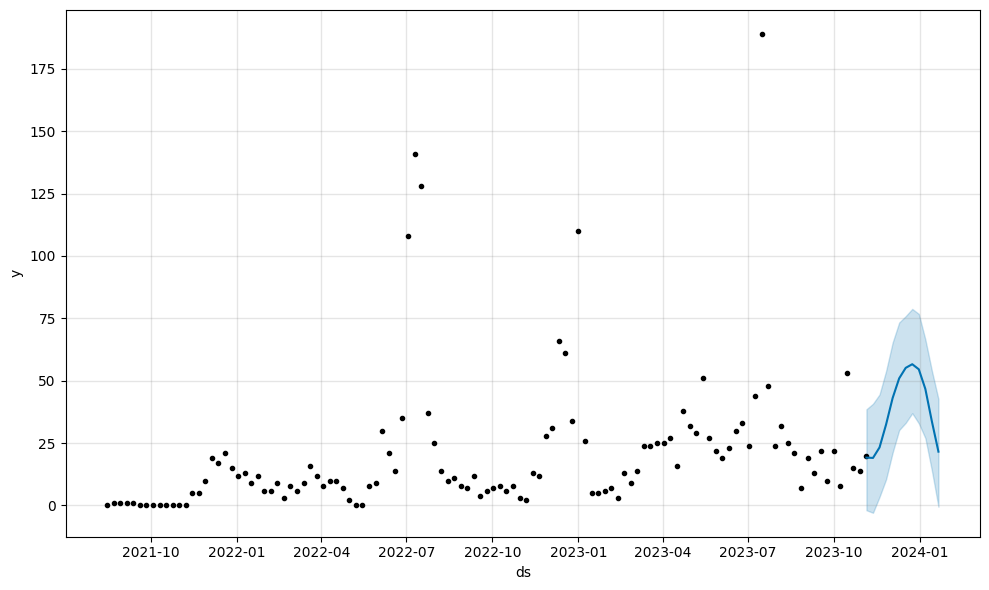

In [154]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
model.fit(df)
df = df.set_index('ds')
prediction=model.predict(future_dates)
model.plot(prediction)
df_prediction = model.predict(future_dates)
df.columns = ['df']

In [158]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-11-05,33.896323,-1.901061,38.549458,33.896323,33.896323,-14.716167,-14.716167,-14.716167,-14.716167,-14.716167,-14.716167,0.0,0.0,0.0,19.180156
1,2023-11-12,34.100364,-2.925434,40.767324,34.100364,34.100364,-15.038837,-15.038837,-15.038837,-15.038837,-15.038837,-15.038837,0.0,0.0,0.0,19.061527
2,2023-11-19,34.304405,3.464887,44.492840,34.304405,34.304406,-11.033577,-11.033577,-11.033577,-11.033577,-11.033577,-11.033577,0.0,0.0,0.0,23.270829
3,2023-11-26,34.508447,10.486540,53.879763,34.508446,34.508447,-2.048377,-2.048377,-2.048377,-2.048377,-2.048377,-2.048377,0.0,0.0,0.0,32.460070
4,2023-12-03,34.712488,21.208320,65.294924,34.712487,34.712489,8.341770,8.341770,8.341770,8.341770,8.341770,8.341770,0.0,0.0,0.0,43.054258
5,2023-12-10,34.916529,30.236365,73.319512,34.916527,34.916531,16.033911,16.033911,16.033911,16.033911,16.033911,16.033911,0.0,0.0,0.0,50.950440
6,2023-12-17,35.120570,33.128305,75.874179,35.120567,35.120573,20.041076,20.041076,20.041076,20.041076,20.041076,20.041076,0.0,0.0,0.0,55.161647
7,2023-12-24,35.324612,36.981839,78.789446,35.324608,35.324616,21.298541,21.298541,21.298541,21.298541,21.298541,21.298541,0.0,0.0,0.0,56.623153
8,2023-12-31,35.528653,32.928544,76.782391,35.528648,35.528658,19.052582,19.052582,19.052582,19.052582,19.052582,19.052582,0.0,0.0,0.0,54.581235
9,2024-01-07,35.732694,27.004527,66.541130,35.732688,35.732700,10.979924,10.979924,10.979924,10.979924,10.979924,10.979924,0.0,0.0,0.0,46.712618


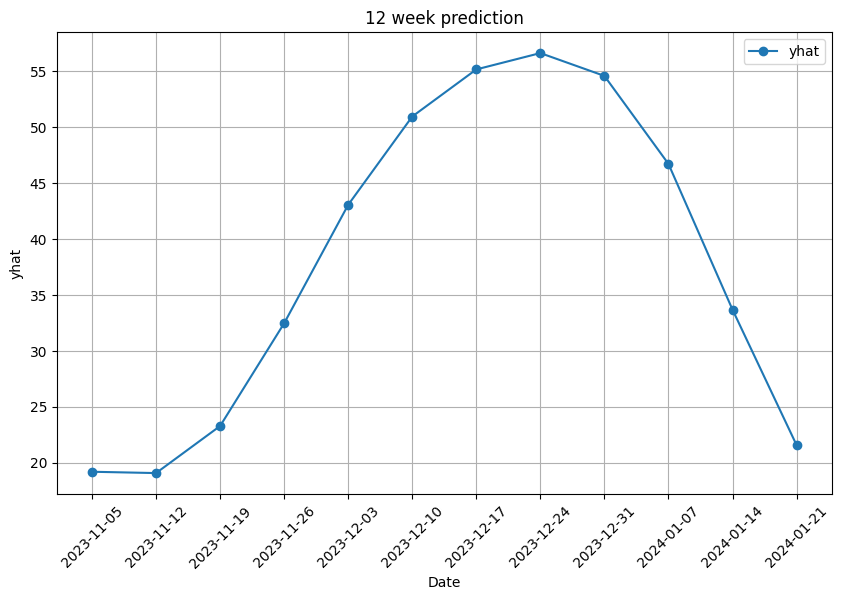

362.33364162326086

In [169]:
pred = prediction[['ds','yhat','yhat_upper']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()
sum(pred[4:]["yhat"])

In [160]:
pred

,ds,yhat,yhat_upper
0,2023-11-05,19.180156,38.549458
1,2023-11-12,19.061527,40.767324
2,2023-11-19,23.270829,44.492840
3,2023-11-26,32.460070,53.879763
4,2023-12-03,43.054258,65.294924
5,2023-12-10,50.950440,73.319512
6,2023-12-17,55.161647,75.874179
7,2023-12-24,56.623153,78.789446
8,2023-12-31,54.581235,76.782391
9,2024-01-07,46.712618,66.541130


In [167]:
sum(pred[4:]["yhat_upper"])

533.2057842220584

In [168]:
sum(pred[4:]["yhat"])

362.33364162326086

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3679141377.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3679141377.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
19:33:44 - cmdstanpy - INFO - Chain [1] start processing
19:33:44 - cmdstanpy - INFO - Chain [1] done processing


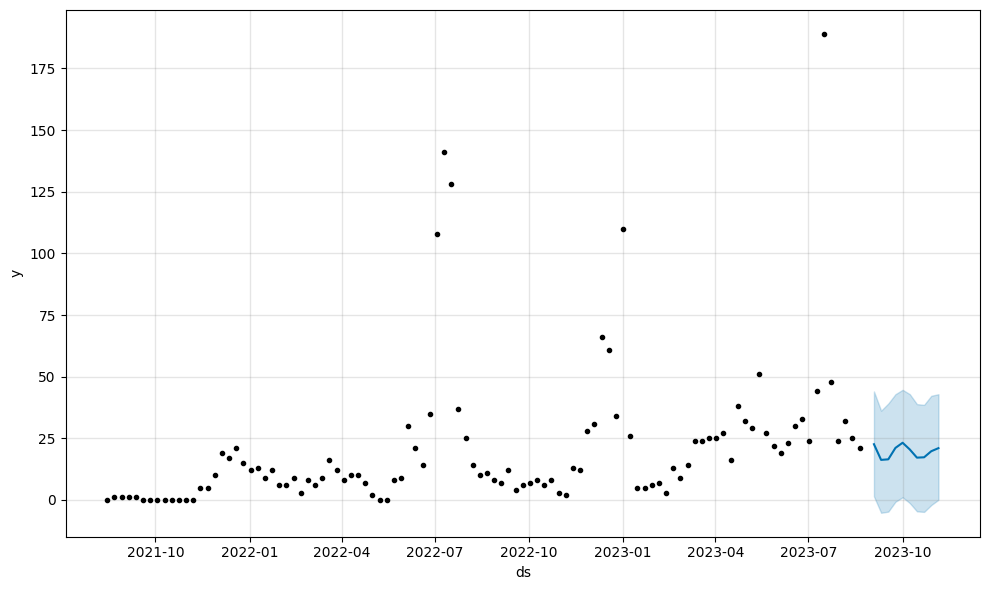

In [78]:
df = data_file[['End Date',11461]]
df_val = df[0:10]
val_dates = df_val['End Date']
val = pd.DataFrame(val_dates)
val.rename(columns={'End Date':'ds'},inplace=True)

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
dfv = df[11:]
model.fit(dfv)
df = df.set_index('ds')
prediction=model.predict(val)
model.plot(prediction)
df_prediction = model.predict(val)
df.columns = ['df']

In [79]:
df_val

,End Date,11461
0,2023-11-05,20
1,2023-10-29,14
2,2023-10-22,15
3,2023-10-15,53
4,2023-10-08,8
5,2023-10-01,22
6,2023-09-24,10
7,2023-09-17,22
8,2023-09-10,13
9,2023-09-03,19


/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/865799487.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/865799487.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
19:33:44 - cmdstanpy - INFO - Chain [1] start processing


19:33:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 165.8826151900163
Root Mean Squared Error (RMSE): 12.87954250701539
Squared Difference between yhat and 11461:
0      12.998083
1      10.540650
2      30.567031
3     123.374584
4       1.431584
5     155.716017
6    1284.670892
7       5.295315
8      33.221187
9       1.010808
dtype: float64
Mean Absolute Error (MAE): 8.21
Mean Absolute Percentage Error (MAPE): 47.07%
Root Mean Squared Error (RMSE) Percentage: 28.62%
R-squared: -0.14


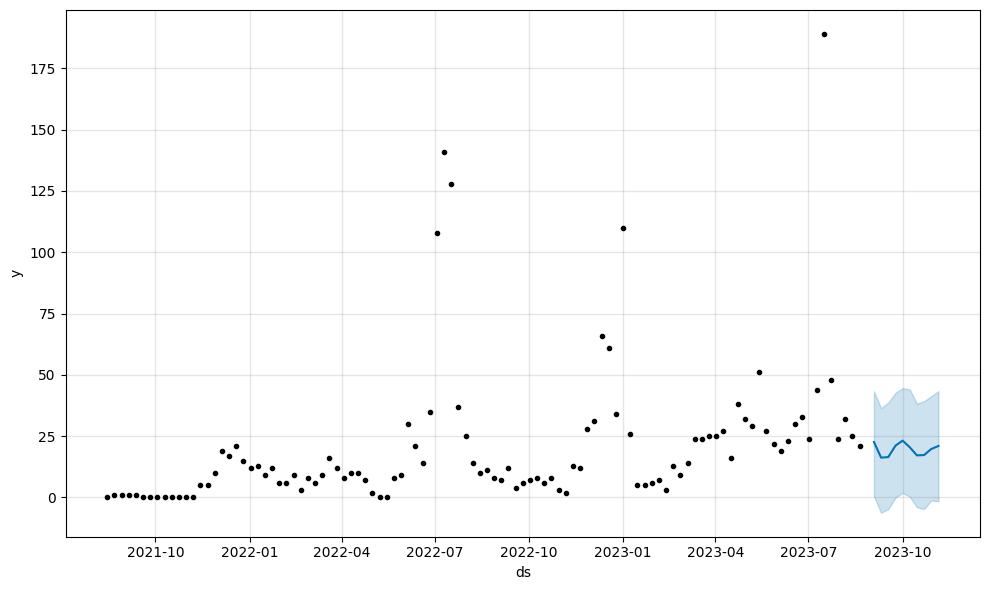

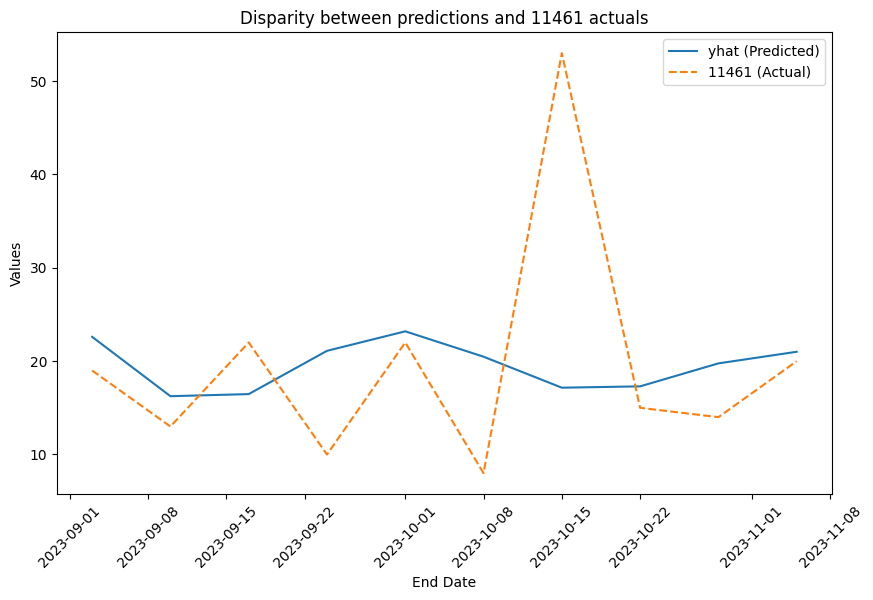

In [80]:
df = data_file[['End Date',11461]]
df_val = df[0:10]
val_dates = df_val['End Date']
val = pd.DataFrame(val_dates)
val.rename(columns={'End Date':'ds'},inplace=True)

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
dfv = df[11:]
model.fit(dfv)
df = df.set_index('ds')
prediction=model.predict(val)
model.plot(prediction)
df_prediction = model.predict(val)
df.columns = ['df']

df_pred = df_prediction[['ds','yhat']]
merged_df = pd.merge(df_pred, df_val, left_on='ds', right_on='End Date', how='inner')
import pandas as pd
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(merged_df['yhat'], merged_df[11461])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate squared difference between 'yhat' and '11461'
squared_difference = (merged_df['yhat'] - merged_df[11461])**2
print(f'Squared Difference between yhat and 11461:\n{squared_difference}')

import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(merged_df['yhat'] - merged_df[11461]))
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((merged_df['yhat'] - merged_df[11461]) / merged_df[11461])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


# Calculate the range of the target variable
target_range = merged_df[11461].max() - merged_df[11461].min()

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# Calculate RMSE as a percentage of the target variable's range
rmse_percentage = (rmse / target_range) * 100

print(f'Root Mean Squared Error (RMSE) Percentage: {rmse_percentage:.2f}%')

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(merged_df[11461], merged_df['yhat'])
print(f'R-squared: {r_squared:.2f}')

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a DataFrame called df
# If not, you can create one using pd.DataFrame(your_data)

# Extract relevant columns
dates = pd.to_datetime(merged_df['End Date'])
yhat_values = merged_df['yhat']
actual_values = merged_df[11461]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, yhat_values, label='yhat (Predicted)')
plt.plot(dates, actual_values, label='11461 (Actual)', linestyle='dashed')

# Adding labels and title
plt.xlabel('End Date')
plt.ylabel('Values')
plt.title('Disparity between predictions and 11461 actuals')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.show()




In [81]:
print(mse**0.5)

12.87954250701539


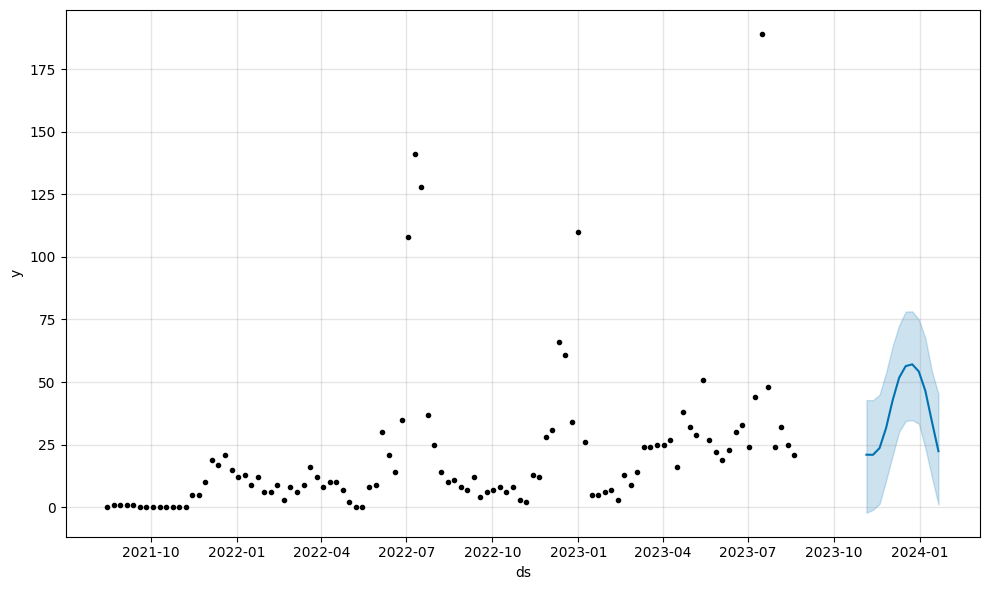

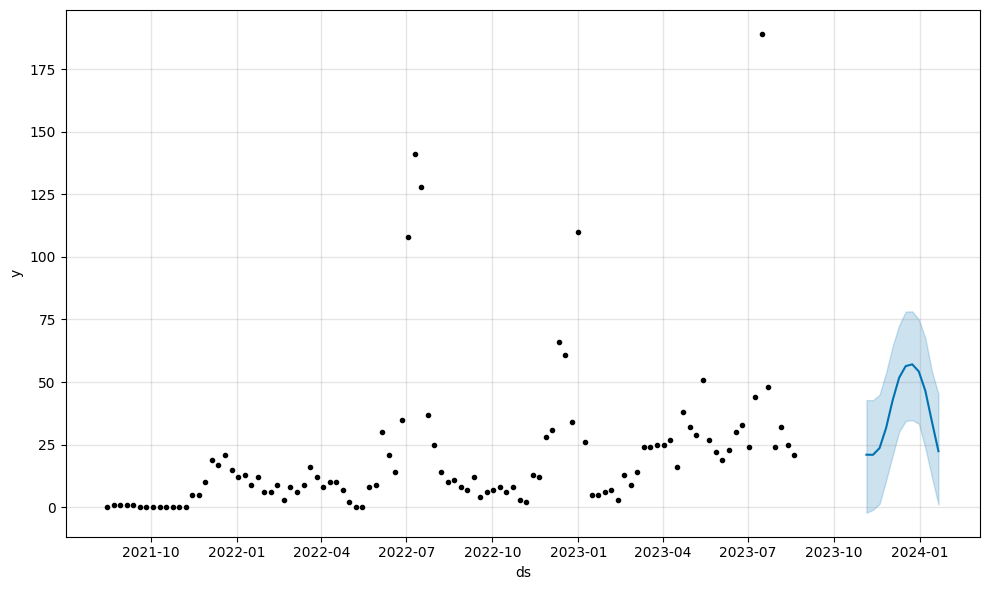

In [82]:
prediction=model.predict(future_dates)
model.plot(prediction)

In [83]:
future_dates

,ds
0,2023-11-05
1,2023-11-12
2,2023-11-19
3,2023-11-26
4,2023-12-03
5,2023-12-10
6,2023-12-17
7,2023-12-24
8,2023-12-31
9,2024-01-07


In [170]:
df = data_file[['End Date',83019]]

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
20:11:41 - cmdstanpy - INFO - Chain [1] start processing
20:11:41 - cmdstanpy - INFO - Chain [1] done processing


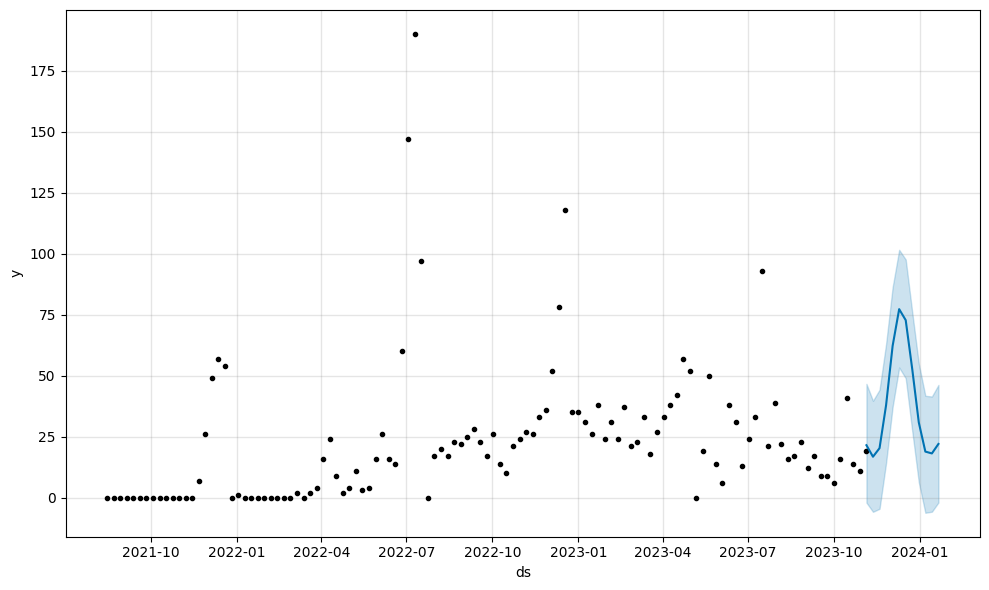

In [171]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
model.fit(df)
df = df.set_index('ds')
prediction=model.predict(future_dates)
model.plot(prediction)
df_prediction = model.predict(future_dates)
df.columns = ['df']

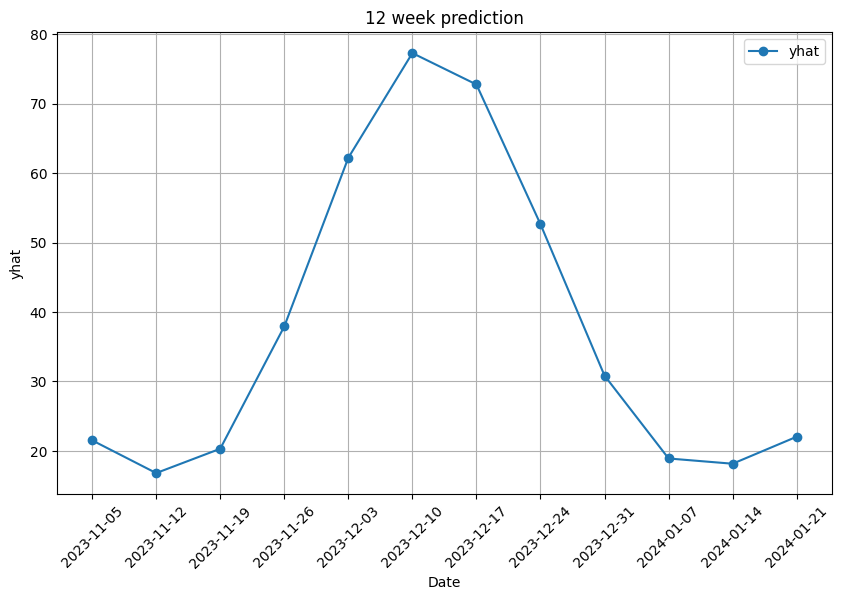

354.7885584633883

In [172]:
pred = prediction[['ds','yhat','yhat_upper']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()
sum(pred[4:]["yhat"])

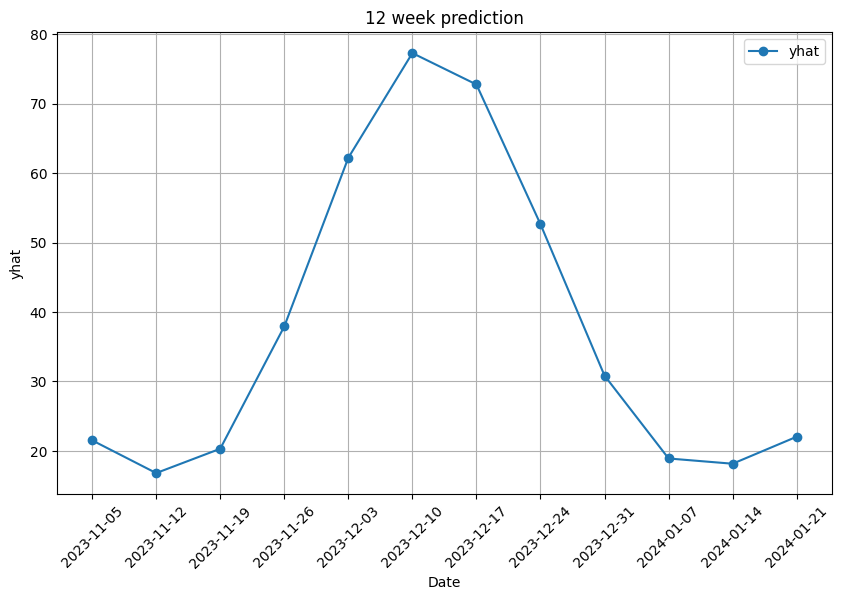

In [86]:
pred = prediction[['ds','yhat']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/2677109420.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/2677109420.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
19:33:45 - cmdstanpy - INFO - Chain [1] start processing
19:33:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 318.35228078491565
Root Mean Squared Error (RMSE): 17.842429228805017
Squared Difference between yhat and 11461:
0    203.909851
1     56.349929
2    423.183130
3    607.727250
4    566.380743
5     32.669777
6    471.641188
7    138.098240
8    494.528515
9    189.034185
dtype: float64
Mean Absolute Error (MAE): 16.60
Mean Absolute Percentage Error (MAPE): 150.94%
Root Mean Squared Error (RMSE) Percentage: 50.98%
R-squared: -2.64


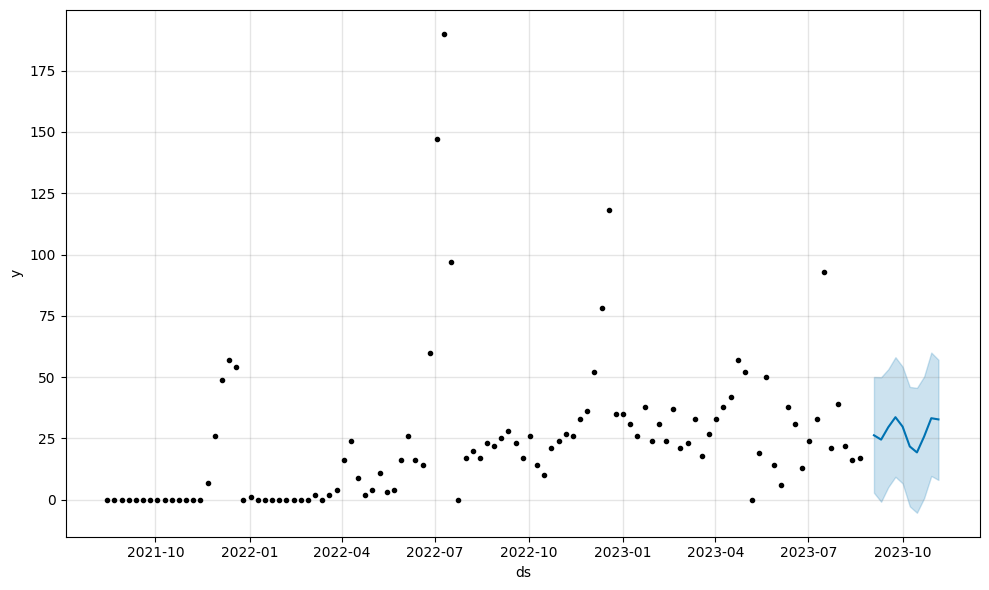

In [87]:
df = data_file[['End Date',83019]]
df_val = df[0:10]
val_dates = df_val['End Date']
val = pd.DataFrame(val_dates)
val.rename(columns={'End Date':'ds'},inplace=True)

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
dfv = df[11:]
model.fit(dfv)
df = df.set_index('ds')
prediction=model.predict(val)
model.plot(prediction)
df_prediction = model.predict(val)
df.columns = ['df']

df_pred = df_prediction[['ds','yhat']]
merged_df = pd.merge(df_pred, df_val, left_on='ds', right_on='End Date', how='inner')
import pandas as pd
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(merged_df['yhat'], merged_df[83019])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate squared difference between 'yhat' and '11461'
squared_difference = (merged_df['yhat'] - merged_df[83019])**2
print(f'Squared Difference between yhat and 11461:\n{squared_difference}')

import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(merged_df['yhat'] - merged_df[83019]))
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((merged_df['yhat'] - merged_df[83019]) / merged_df[83019])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


# Calculate the range of the target variable
target_range = merged_df[83019].max() - merged_df[83019].min()

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# Calculate RMSE as a percentage of the target variable's range
rmse_percentage = (rmse / target_range) * 100

print(f'Root Mean Squared Error (RMSE) Percentage: {rmse_percentage:.2f}%')

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(merged_df[83019], merged_df['yhat'])
print(f'R-squared: {r_squared:.2f}')




In [173]:
df = data_file[['End Date',97696]]

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
20:12:35 - cmdstanpy - INFO - Chain [1] start processing
20:12:35 - cmdstanpy - INFO - Chain [1] done processing


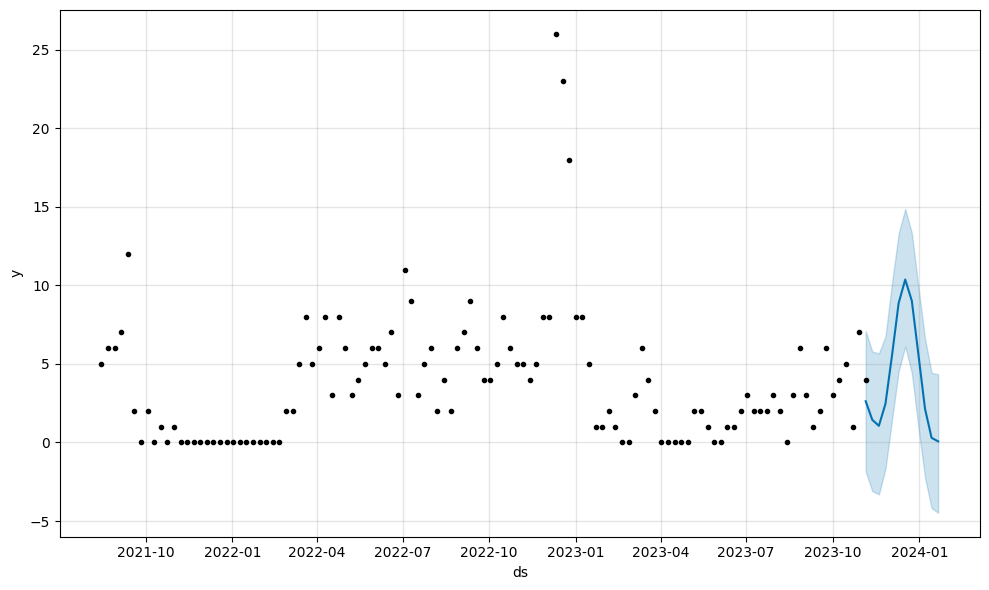

In [174]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
model.fit(df)
df = df.set_index('ds')
prediction=model.predict(future_dates)
model.plot(prediction)
df_prediction = model.predict(future_dates)
df.columns = ['df']

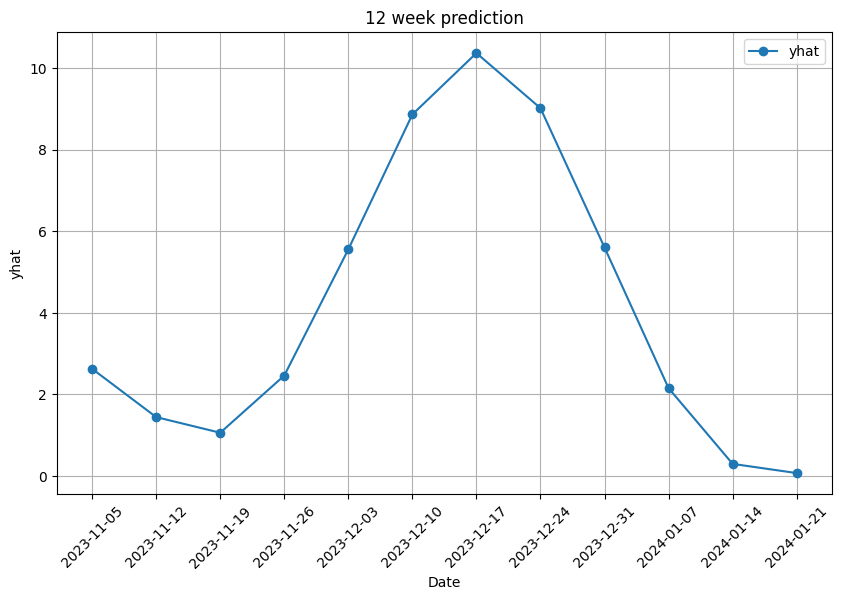

41.93303717246037

In [175]:
pred = prediction[['ds','yhat','yhat_upper']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()
sum(pred[4:]["yhat"])

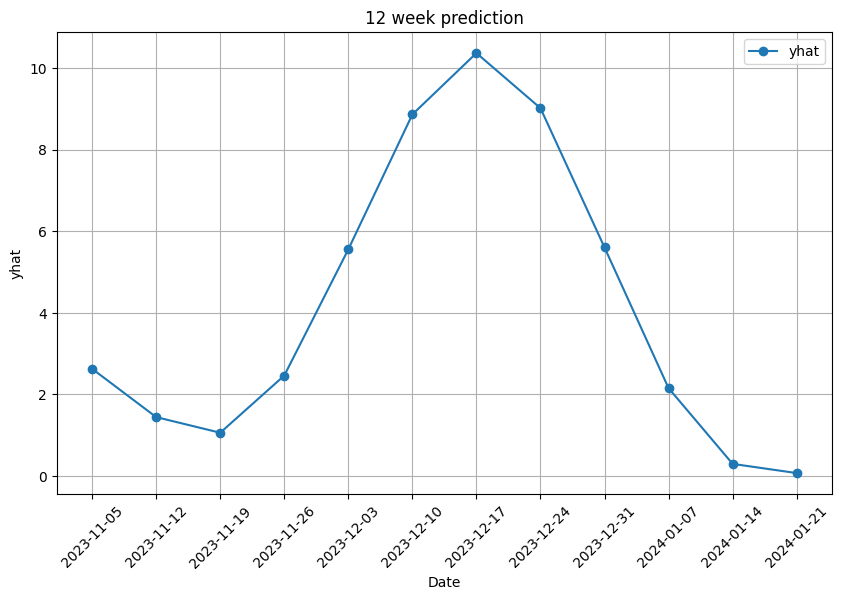

In [90]:
pred = prediction[['ds','yhat']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3144110512.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3144110512.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
19:33:46 - cmdstanpy - INFO - Chain [1] start processing
19:33:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 13.787389639800688
Root Mean Squared Error (RMSE): 3.7131374388515015
Squared Difference between yhat and 11461:
0    29.325692
1    58.037715
2    23.721368
3     2.598832
4     0.036993
5     1.348833
6     1.375758
7    12.365941
8     8.075543
9     0.987221
dtype: float64
Mean Absolute Error (MAE): 2.94
Mean Absolute Percentage Error (MAPE): 168.87%
Root Mean Squared Error (RMSE) Percentage: 61.89%
R-squared: -2.79


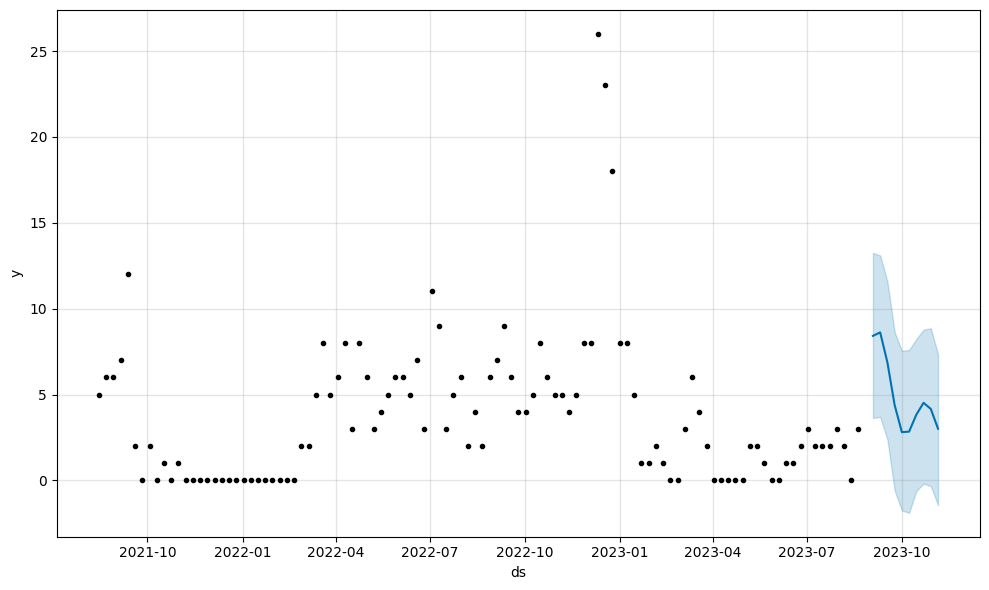

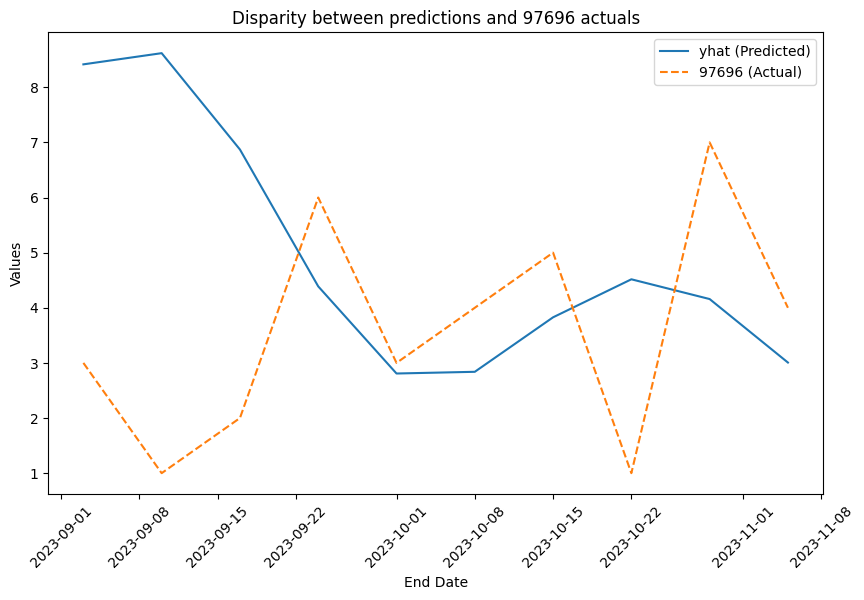

In [91]:
df = data_file[['End Date',97696]]
df_val = df[0:10]
val_dates = df_val['End Date']
val = pd.DataFrame(val_dates)
val.rename(columns={'End Date':'ds'},inplace=True)

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
dfv = df[11:]
model.fit(dfv)
df = df.set_index('ds')
prediction=model.predict(val)
model.plot(prediction)
df_prediction = model.predict(val)
df.columns = ['df']

df_pred = df_prediction[['ds','yhat']]
merged_df = pd.merge(df_pred, df_val, left_on='ds', right_on='End Date', how='inner')
import pandas as pd
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(merged_df['yhat'], merged_df[97696])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate squared difference between 'yhat' and '11461'
squared_difference = (merged_df['yhat'] - merged_df[97696])**2
print(f'Squared Difference between yhat and 11461:\n{squared_difference}')

import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(merged_df['yhat'] - merged_df[97696]))
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((merged_df['yhat'] - merged_df[97696]) / merged_df[97696])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


# Calculate the range of the target variable
target_range = merged_df[97696].max() - merged_df[97696].min()

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# Calculate RMSE as a percentage of the target variable's range
rmse_percentage = (rmse / target_range) * 100

print(f'Root Mean Squared Error (RMSE) Percentage: {rmse_percentage:.2f}%')

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(merged_df[97696], merged_df['yhat'])
print(f'R-squared: {r_squared:.2f}')

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a DataFrame called df
# If not, you can create one using pd.DataFrame(your_data)

# Extract relevant columns
dates = pd.to_datetime(merged_df['End Date'])
yhat_values = merged_df['yhat']
actual_values = merged_df[97696]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, yhat_values, label='yhat (Predicted)')
plt.plot(dates, actual_values, label='97696 (Actual)', linestyle='dashed')

# Adding labels and title
plt.xlabel('End Date')
plt.ylabel('Values')
plt.title('Disparity between predictions and 97696 actuals')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.show()



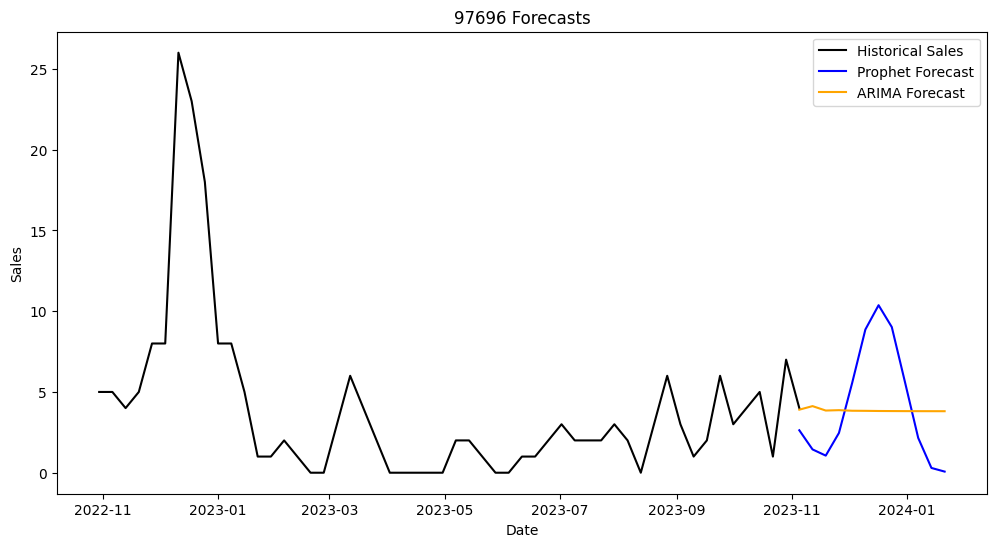

In [92]:
df.reset_index(inplace=True)
df.sort_values("ds", inplace=True)
plotdf = df.rename(columns={'ds':'Date', 'df':'Sales'})
arima_forecast['SKU 97696']
arima_forecast['ds'] = pred['ds']
pred['ds'] = pd.to_datetime(pred['ds'])
pred.rename(columns={'yhat': 'Prophet'}, inplace=True)

arima_forecast['ds'] = pd.to_datetime(arima_forecast['ds'])

# Merging the Prophet and ARIMA forecasts
combined_forecast = pd.merge(pred, arima_forecast, on='ds', how='outer')
combined_forecast.rename(columns={'SKU 97696': 'ARIMA'}, inplace=True)

plotdf['Date'] = pd.to_datetime(plotdf['Date'])

# Merging with the historical data
full_data = pd.concat([plotdf, combined_forecast], sort=False).reset_index(drop=True)

full_data = full_data[63:]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(full_data['Date'], full_data['Sales'], label='Historical Sales', color='black')
plt.plot(full_data['ds'], full_data['Prophet'], label='Prophet Forecast', color='blue')
plt.plot(full_data['ds'], full_data['ARIMA'], label='ARIMA Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('97696 Forecasts')
plt.legend()
plt.show()

In [176]:
df = data_file[['End Date',105324]]

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
20:13:09 - cmdstanpy - INFO - Chain [1] start processing
20:13:09 - cmdstanpy - INFO - Chain [1] done processing


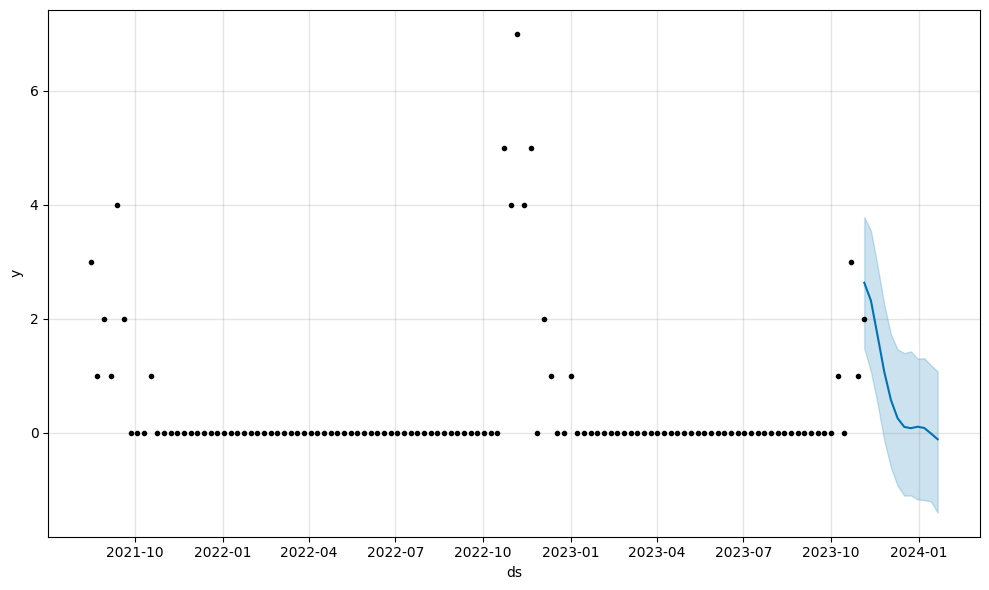

In [177]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
model.fit(df)
df = df.set_index('ds')
prediction=model.predict(future_dates)
model.plot(prediction)
df_prediction = model.predict(future_dates)
df.columns = ['df']

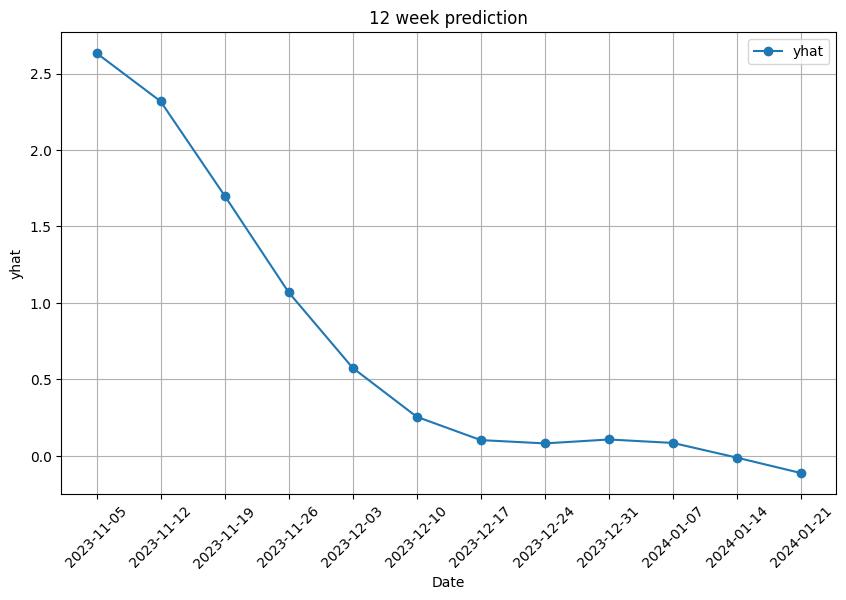

1.0791743786842842

In [178]:
pred = prediction[['ds','yhat','yhat_upper']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()
sum(pred[4:]["yhat"])

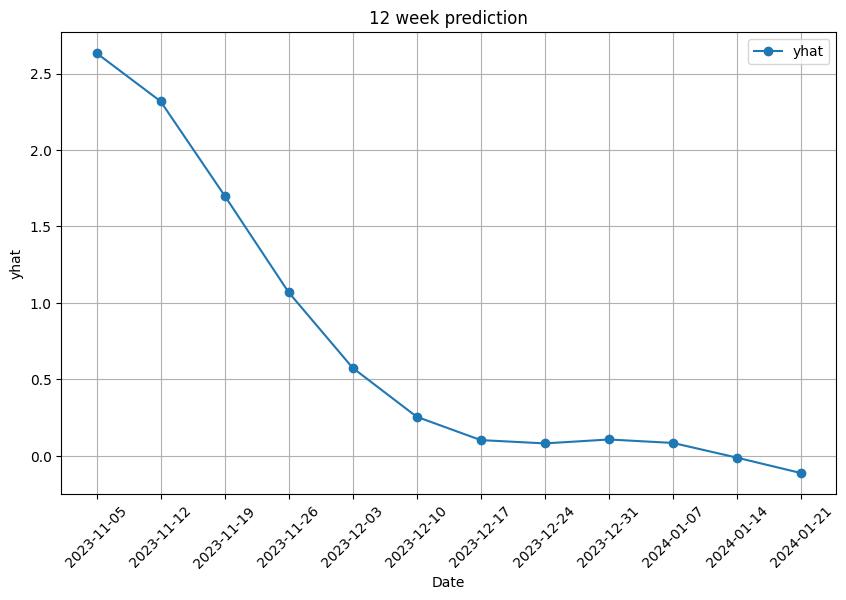

In [144]:
pred = prediction[['ds','yhat']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/79513648.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/79513648.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
19:33:47 - cmdstanpy - INFO - Chain [1] start processing


19:33:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 1.4146154983195762
Root Mean Squared Error (RMSE): 1.1893760962452442
Squared Difference between yhat and 11461:
0    1.514602
1    2.217430
2    1.903376
3    0.664921
4    0.027532
5    0.941886
6    0.504813
7    1.197958
8    3.689376
9    1.484261
dtype: float64
Mean Absolute Error (MAE): 1.10
Mean Absolute Percentage Error (MAPE): inf%
Root Mean Squared Error (RMSE) Percentage: 39.65%
R-squared: -0.40


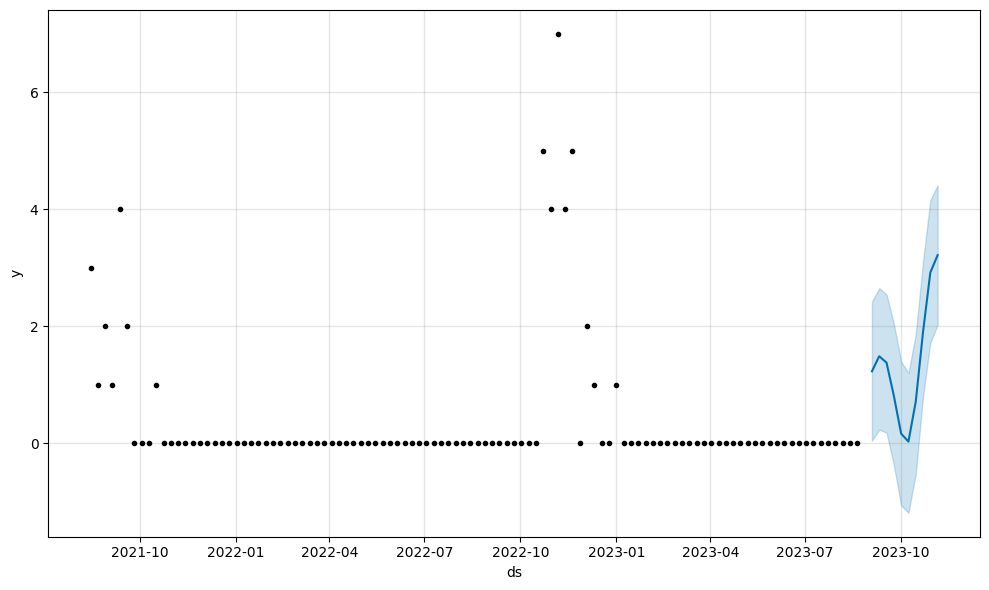

In [95]:
df = data_file[['End Date',105324]]
df_val = df[0:10]
val_dates = df_val['End Date']
val = pd.DataFrame(val_dates)
val.rename(columns={'End Date':'ds'},inplace=True)

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
dfv = df[11:]
model.fit(dfv)
df = df.set_index('ds')
prediction=model.predict(val)
model.plot(prediction)
df_prediction = model.predict(val)
df.columns = ['df']

df_pred = df_prediction[['ds','yhat']]
merged_df = pd.merge(df_pred, df_val, left_on='ds', right_on='End Date', how='inner')
import pandas as pd
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(merged_df['yhat'], merged_df[105324])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate squared difference between 'yhat' and '11461'
squared_difference = (merged_df['yhat'] - merged_df[105324])**2
print(f'Squared Difference between yhat and 11461:\n{squared_difference}')

import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(merged_df['yhat'] - merged_df[105324]))
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((merged_df['yhat'] - merged_df[105324]) / merged_df[105324])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


# Calculate the range of the target variable
target_range = merged_df[105324].max() - merged_df[105324].min()

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# Calculate RMSE as a percentage of the target variable's range
rmse_percentage = (rmse / target_range) * 100

print(f'Root Mean Squared Error (RMSE) Percentage: {rmse_percentage:.2f}%')

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(merged_df[105324], merged_df['yhat'])
print(f'R-squared: {r_squared:.2f}')



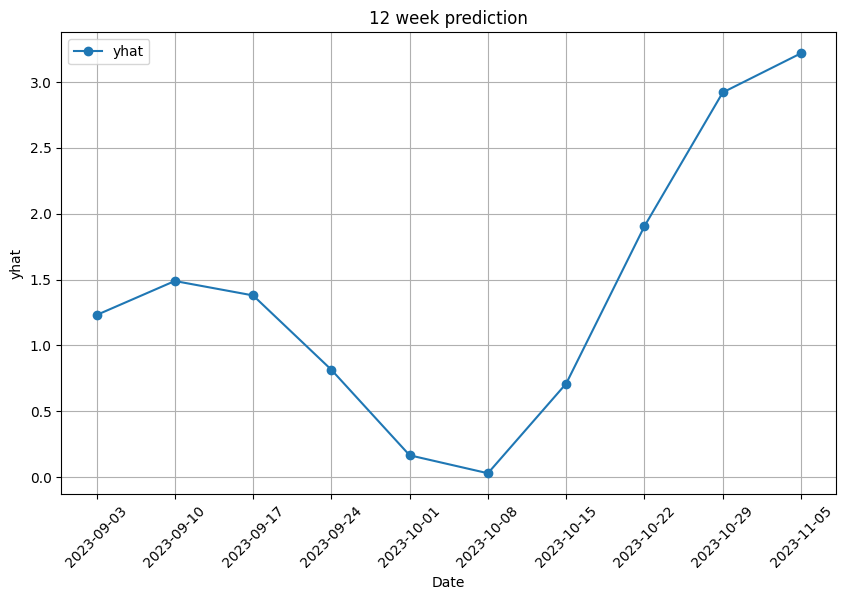

In [96]:
pred = prediction[['ds','yhat']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()

In [179]:
df = data_file[['End Date',193895]]

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
20:13:52 - cmdstanpy - INFO - Chain [1] start processing
20:13:52 - cmdstanpy - INFO - Chain [1] done processing


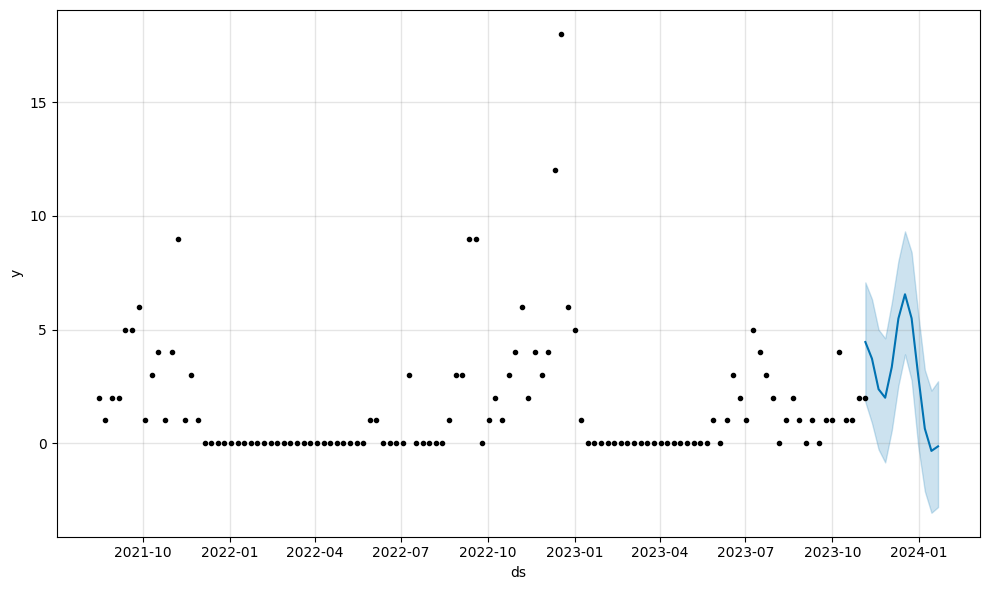

In [180]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
model.fit(df)
df = df.set_index('ds')
prediction=model.predict(future_dates)
model.plot(prediction)
df_prediction = model.predict(future_dates)
df.columns = ['df']

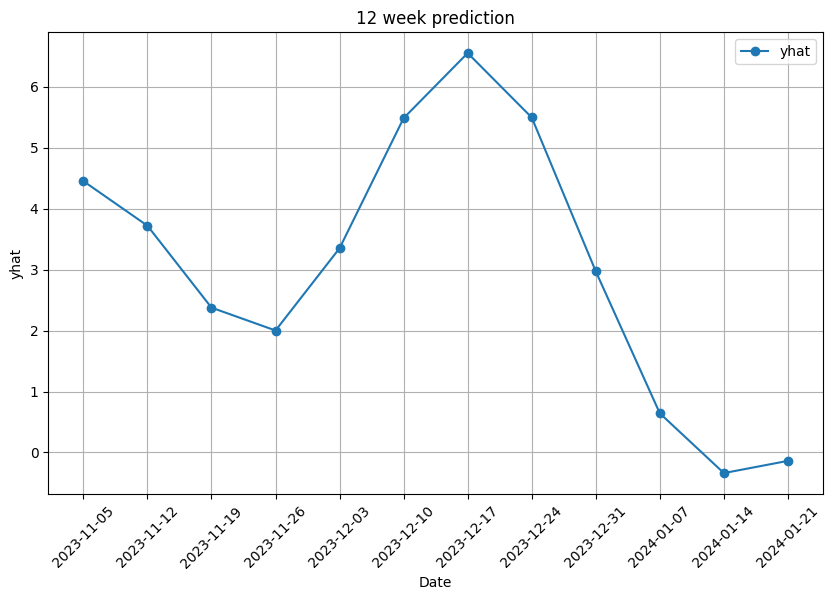

24.01697083823659

In [181]:
pred = prediction[['ds','yhat','yhat_upper']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()
sum(pred[4:]["yhat"])

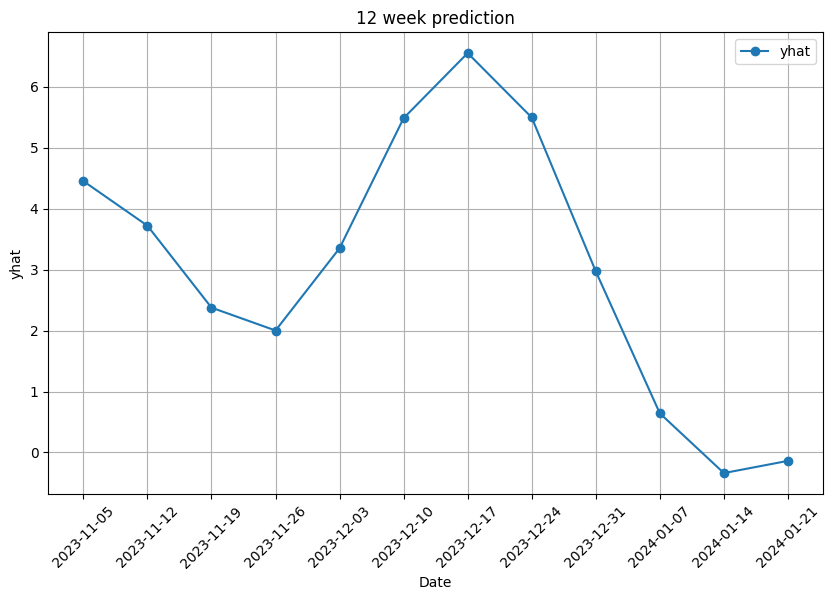

In [147]:
pred = prediction[['ds','yhat']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()

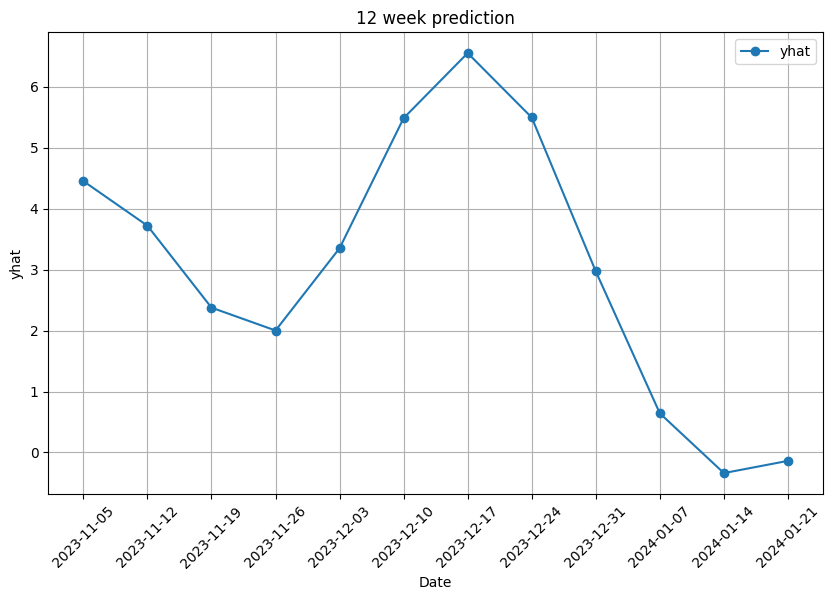

In [130]:
pred = prediction[['ds','yhat']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3233177523.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3233177523.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
19:33:47 - cmdstanpy - INFO - Chain [1] start processing
19:33:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 22.3593211905227
Root Mean Squared Error (RMSE): 4.728564390015505
Squared Difference between yhat and 11461:
0    30.523807
1    34.740790
2    54.213724
3    30.078236
4    12.879890
5     1.160692
6     3.281771
7    11.741916
8    19.550355
9    25.422031
dtype: float64
Mean Absolute Error (MAE): 4.36
Mean Absolute Percentage Error (MAPE): inf%
Root Mean Squared Error (RMSE) Percentage: 118.21%
R-squared: -17.48


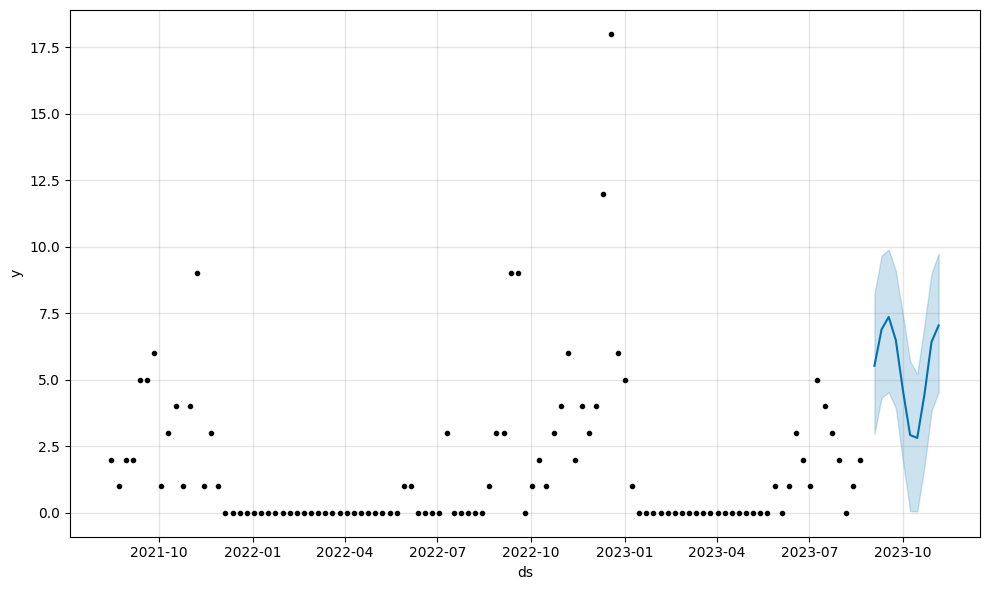

In [99]:
df = data_file[['End Date',193895]]
df_val = df[0:10]
val_dates = df_val['End Date']
val = pd.DataFrame(val_dates)
val.rename(columns={'End Date':'ds'},inplace=True)

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
dfv = df[11:]
model.fit(dfv)
df = df.set_index('ds')
prediction=model.predict(val)
model.plot(prediction)
df_prediction = model.predict(val)
df.columns = ['df']

df_pred = df_prediction[['ds','yhat']]
merged_df = pd.merge(df_pred, df_val, left_on='ds', right_on='End Date', how='inner')
import pandas as pd
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(merged_df['yhat'], merged_df[193895])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate squared difference between 'yhat' and '11461'
squared_difference = (merged_df['yhat'] - merged_df[193895])**2
print(f'Squared Difference between yhat and 11461:\n{squared_difference}')

import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(merged_df['yhat'] - merged_df[193895]))
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((merged_df['yhat'] - merged_df[193895]) / merged_df[193895])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


# Calculate the range of the target variable
target_range = merged_df[193895].max() - merged_df[193895].min()

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# Calculate RMSE as a percentage of the target variable's range
rmse_percentage = (rmse / target_range) * 100

print(f'Root Mean Squared Error (RMSE) Percentage: {rmse_percentage:.2f}%')

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(merged_df[193895], merged_df['yhat'])
print(f'R-squared: {r_squared:.2f}')



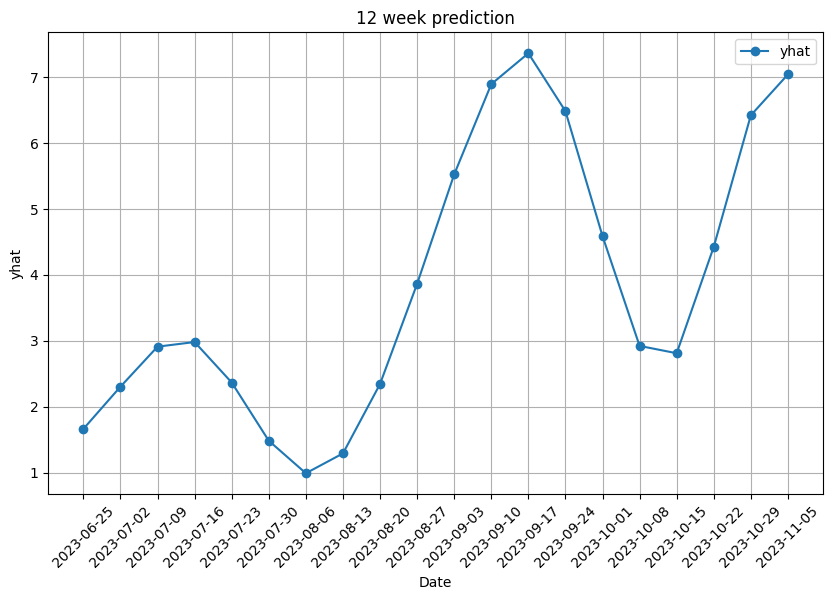

In [198]:
pred = prediction[['ds','yhat']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3571410528.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3571410528.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
14:34:42 - cmdstanpy - INFO - Chain [1] start processing


14:34:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 22.3593211905227
Root Mean Squared Error (RMSE): 4.728564390015505
Squared Difference between yhat and 11461:
0    30.523807
1    34.740790
2    54.213724
3    30.078236
4    12.879890
5     1.160692
6     3.281771
7    11.741916
8    19.550355
9    25.422031
dtype: float64
Mean Absolute Error (MAE): 4.36
Mean Absolute Percentage Error (MAPE): inf%
Root Mean Squared Error (RMSE) Percentage: 118.21%
R-squared: -17.48


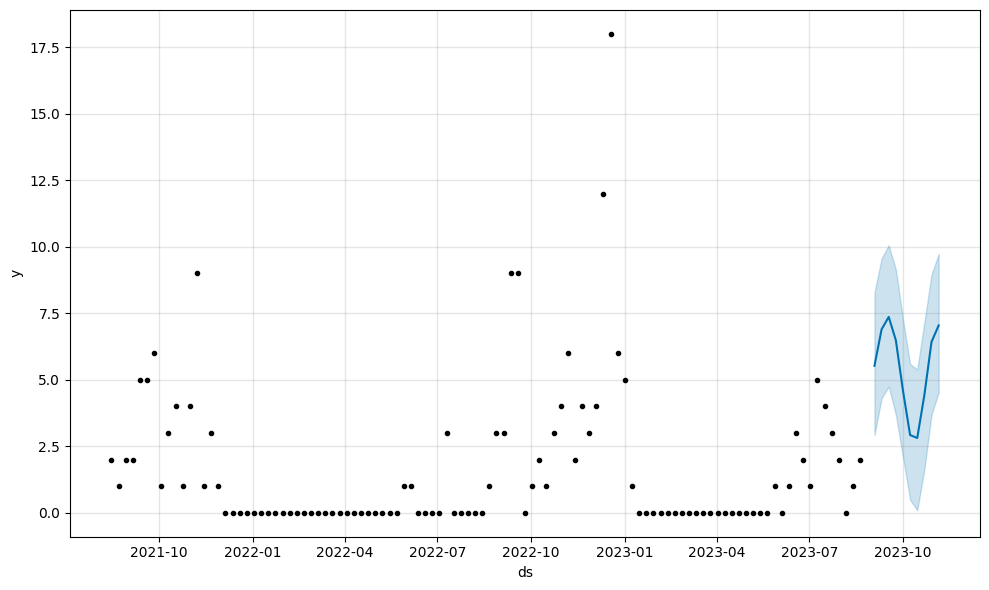

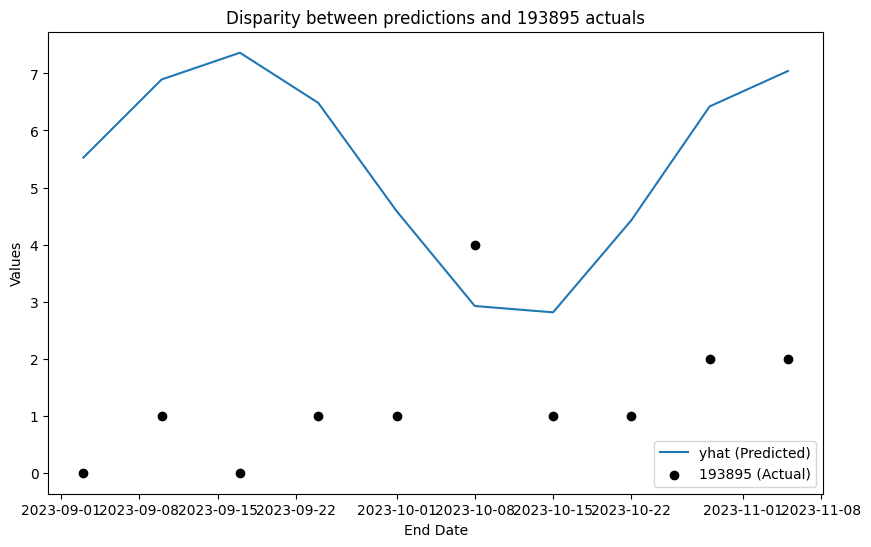

In [205]:
df = data_file[['End Date',193895]]
df_val = df[0:10]
val_dates = df_val['End Date']
val = pd.DataFrame(val_dates)
val.rename(columns={'End Date':'ds'},inplace=True)

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
dfv = df[11:]
model.fit(dfv)
df = df.set_index('ds')
prediction=model.predict(val)
model.plot(prediction)
df_prediction = model.predict(val)
df.columns = ['df']

df_pred = df_prediction[['ds','yhat']]
merged_df = pd.merge(df_pred, df_val, left_on='ds', right_on='End Date', how='inner')
import pandas as pd
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(merged_df['yhat'], merged_df[193895])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate squared difference between 'yhat' and '11461'
squared_difference = (merged_df['yhat'] - merged_df[193895])**2
print(f'Squared Difference between yhat and 11461:\n{squared_difference}')

import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(merged_df['yhat'] - merged_df[193895]))
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((merged_df['yhat'] - merged_df[193895]) / merged_df[193895])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


# Calculate the range of the target variable
target_range = merged_df[193895].max() - merged_df[193895].min()

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# Calculate RMSE as a percentage of the target variable's range
rmse_percentage = (rmse / target_range) * 100

print(f'Root Mean Squared Error (RMSE) Percentage: {rmse_percentage:.2f}%')

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(merged_df[193895], merged_df['yhat'])
print(f'R-squared: {r_squared:.2f}')

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a DataFrame called df
# If not, you can create one using pd.DataFrame(your_data)

# Extract relevant columns
dates = pd.to_datetime(merged_df['End Date'])
yhat_values = merged_df['yhat']
actual_values = merged_df[193895]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, yhat_values, label='yhat (Predicted)')
plt.scatter(dates, actual_values, label='193895 (Actual)', c='black')

# Adding labels and title
plt.xlabel('End Date')
plt.ylabel('Values')
plt.title('Disparity between predictions and 193895 actuals')
plt.legend()

# Display the plot
plt.show()



In [182]:
df = data_file[['End Date',194533]]

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
20:14:20 - cmdstanpy - INFO - Chain [1] start processing
20:14:20 - cmdstanpy - INFO - Chain [1] done processing


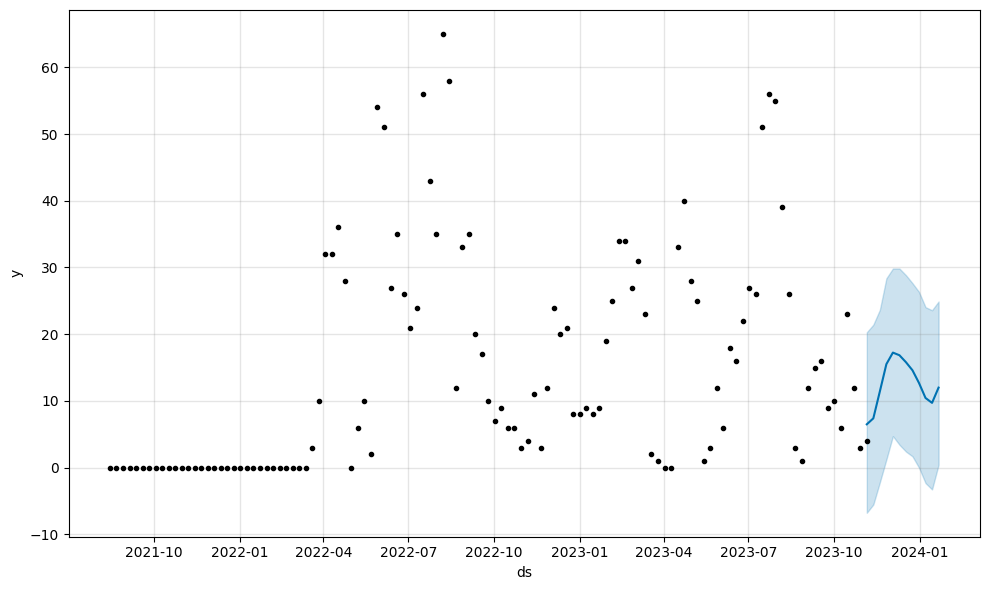

In [183]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
model.fit(df)
df = df.set_index('ds')
prediction=model.predict(future_dates)
model.plot(prediction)
df_prediction = model.predict(future_dates)
df.columns = ['df']

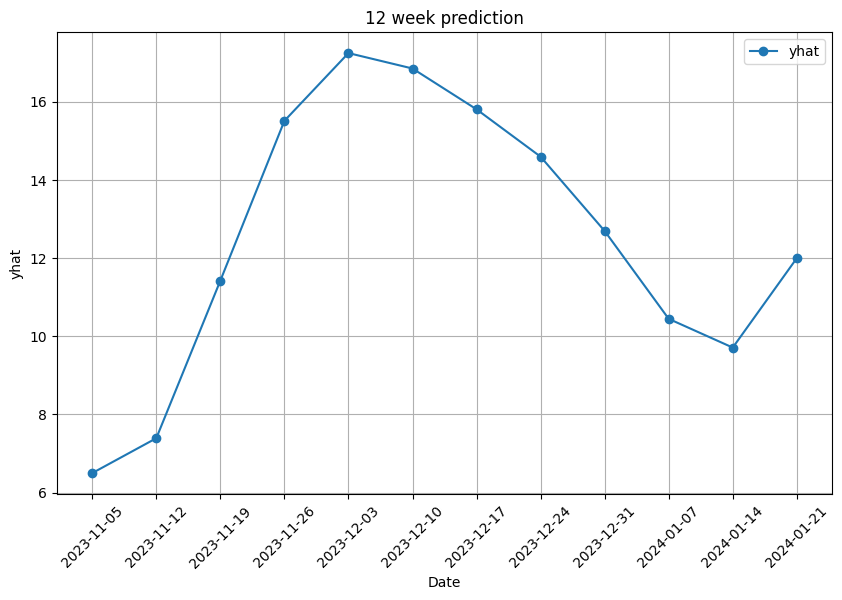

109.33579724368377

In [184]:
pred = prediction[['ds','yhat','yhat_upper']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()
sum(pred[4:]["yhat"])

In [152]:
17.244678 + 16.849696 + 15.805589 + 14.593298 + 12.692531

77.185792

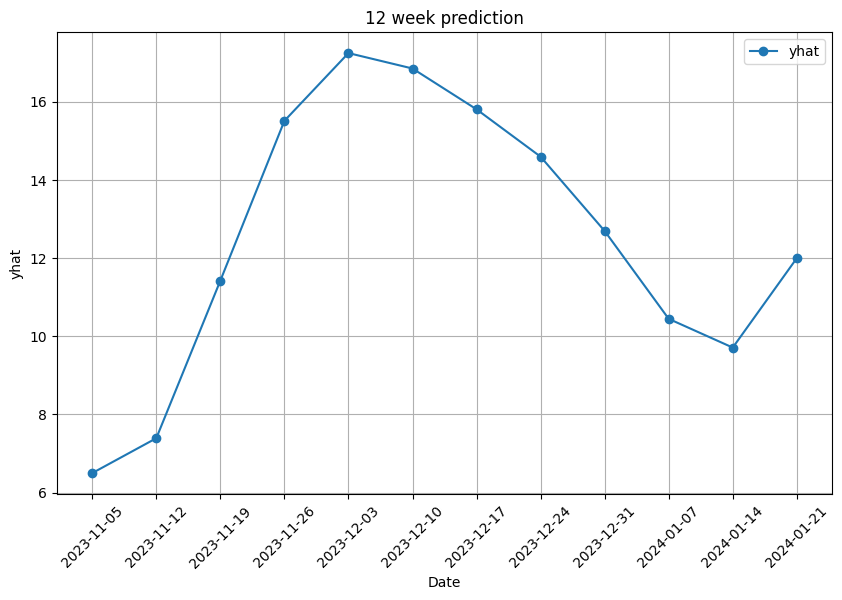

In [150]:
pred = prediction[['ds','yhat']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()

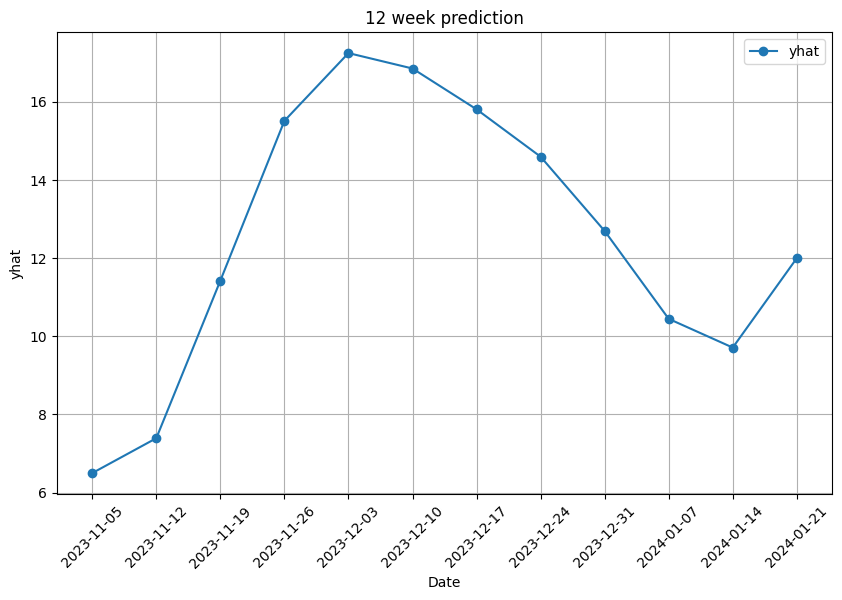

In [133]:
pred = prediction[['ds','yhat']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()

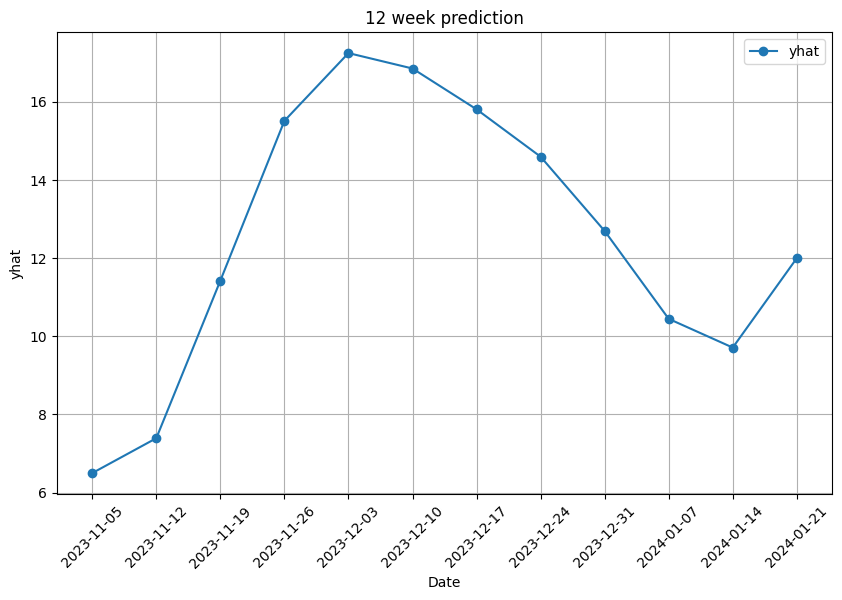

In [104]:
pred = prediction[['ds','yhat']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()

In [105]:
merged_df

,ds,yhat,End Date,193895
0,2023-09-03,5.524836,2023-09-03,0
1,2023-09-10,6.894132,2023-09-10,1
2,2023-09-17,7.362997,2023-09-17,0
3,2023-09-24,6.484363,2023-09-24,1
4,2023-10-01,4.588856,2023-10-01,1
5,2023-10-08,2.922646,2023-10-08,4
6,2023-10-15,2.811566,2023-10-15,1
7,2023-10-22,4.426648,2023-10-22,1
8,2023-10-29,6.421578,2023-10-29,2
9,2023-11-05,7.042026,2023-11-05,2


/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3680687816.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3680687816.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
19:33:49 - cmdstanpy - INFO - Chain [1] start processing


19:33:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 97.03400731564524
Root Mean Squared Error (RMSE): 9.850584110378696
Squared Difference between yhat and 11461:
0     133.603034
1     650.950518
2     207.079156
3     142.572138
4       3.626440
5       2.130553
6      66.264659
7      23.320467
8       0.695239
9       0.311583
10     56.038453
11     46.313001
12    355.100143
13    287.741967
14     56.610600
15     37.468392
16      8.670137
17     25.039079
18      0.057058
19     15.678229
20    128.673338
21      0.047651
22     57.904786
23     22.919553
dtype: float64
Mean Absolute Error (MAE): 7.54
Mean Absolute Percentage Error (MAPE): 157.23%
Root Mean Squared Error (RMSE) Percentage: 17.91%
R-squared: 0.61


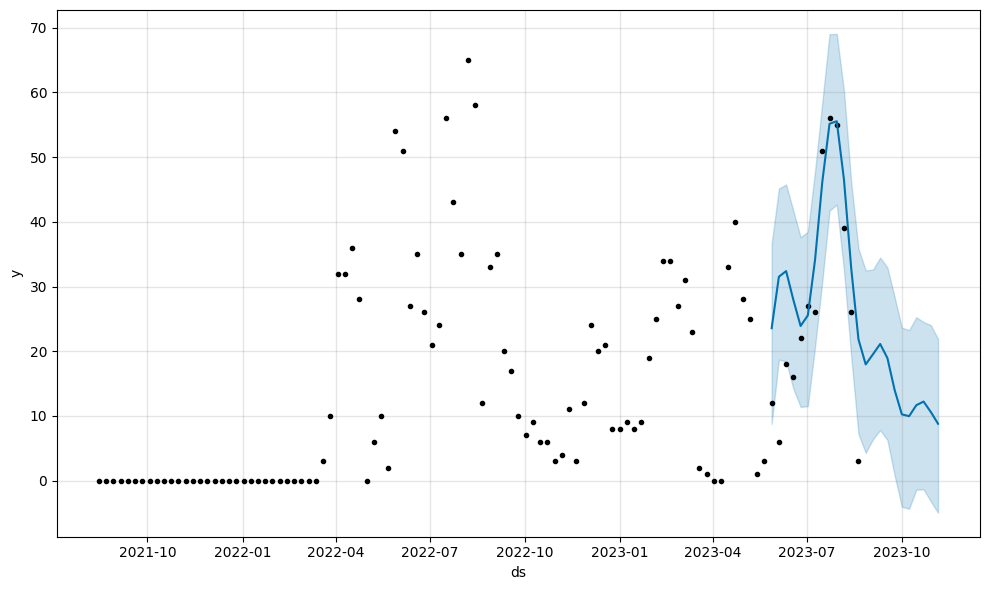

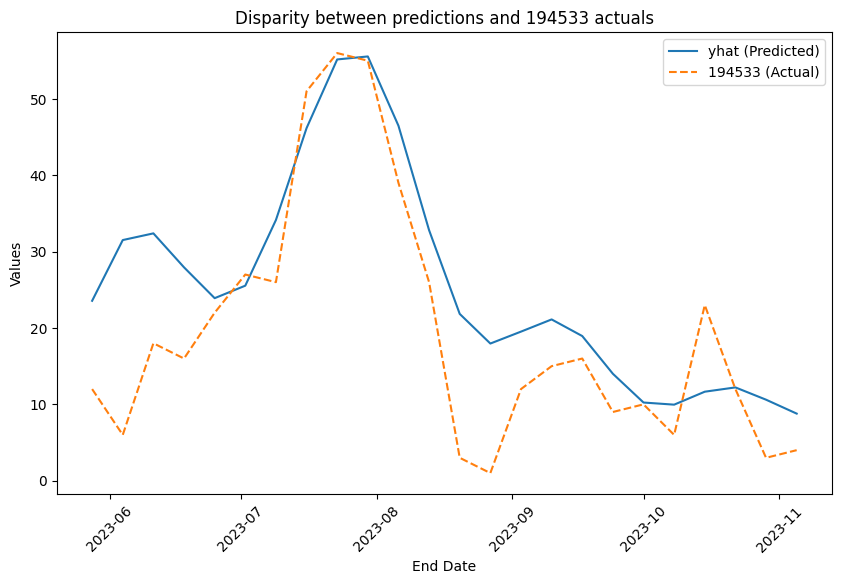

In [106]:
df = data_file[['End Date',194533]]
df_val = df[0:24]
val_dates = df_val['End Date']
val = pd.DataFrame(val_dates)
val.rename(columns={'End Date':'ds'},inplace=True)

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
dfv = df[11:]
model.fit(dfv)
df = df.set_index('ds')
prediction=model.predict(val)
model.plot(prediction)
df_prediction = model.predict(val)
df.columns = ['df']

df_pred = df_prediction[['ds','yhat']]
merged_df = pd.merge(df_pred, df_val, left_on='ds', right_on='End Date', how='inner')
import pandas as pd
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(merged_df['yhat'], merged_df[194533])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate squared difference between 'yhat' and '11461'
squared_difference = (merged_df['yhat'] - merged_df[194533])**2
print(f'Squared Difference between yhat and 11461:\n{squared_difference}')

import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(merged_df['yhat'] - merged_df[194533]))
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((merged_df['yhat'] - merged_df[194533]) / merged_df[194533])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


# Calculate the range of the target variable
target_range = merged_df[194533].max() - merged_df[194533].min()

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# Calculate RMSE as a percentage of the target variable's range
rmse_percentage = (rmse / target_range) * 100

print(f'Root Mean Squared Error (RMSE) Percentage: {rmse_percentage:.2f}%')

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(merged_df[194533], merged_df['yhat'])
print(f'R-squared: {r_squared:.2f}')

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a DataFrame called df
# If not, you can create one using pd.DataFrame(your_data)

# Extract relevant columns
dates = pd.to_datetime(merged_df['End Date'])
yhat_values = merged_df['yhat']
actual_values = merged_df[194533]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, yhat_values, label='yhat (Predicted)')
plt.plot(dates, actual_values, label='194533 (Actual)', linestyle='dashed')

# Adding labels and title
plt.xlabel('End Date')
plt.ylabel('Values')
plt.title('Disparity between predictions and 194533 actuals')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.show()



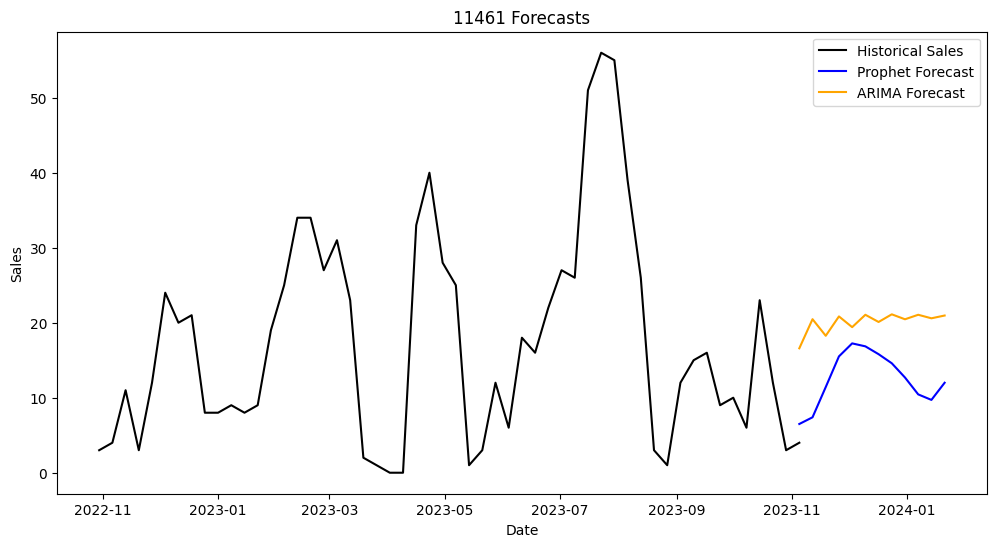

In [107]:
df.reset_index(inplace=True)
df.sort_values("ds", inplace=True)
plotdf = df.rename(columns={'ds':'Date', 'df':'Sales'})
arima_forecast['SKU 11461']
arima_forecast['ds'] = pred['ds']
pred['ds'] = pd.to_datetime(pred['ds'])
pred.rename(columns={'yhat': 'Prophet'}, inplace=True)

arima_forecast['ds'] = pd.to_datetime(arima_forecast['ds'])

# Merging the Prophet and ARIMA forecasts
combined_forecast = pd.merge(pred, arima_forecast, on='ds', how='outer')
combined_forecast.rename(columns={'SKU 11461': 'ARIMA'}, inplace=True)

plotdf['Date'] = pd.to_datetime(plotdf['Date'])

# Merging with the historical data
full_data = pd.concat([plotdf, combined_forecast], sort=False).reset_index(drop=True)

full_data = full_data[63:]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(full_data['Date'], full_data['Sales'], label='Historical Sales', color='black')
plt.plot(full_data['ds'], full_data['Prophet'], label='Prophet Forecast', color='blue')
plt.plot(full_data['ds'], full_data['ARIMA'], label='ARIMA Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('11461 Forecasts')
plt.legend()
plt.show()

In [185]:
df = data_file[['End Date',232240]]

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
20:15:26 - cmdstanpy - INFO - Chain [1] start processing
20:15:26 - cmdstanpy - INFO - Chain [1] done processing


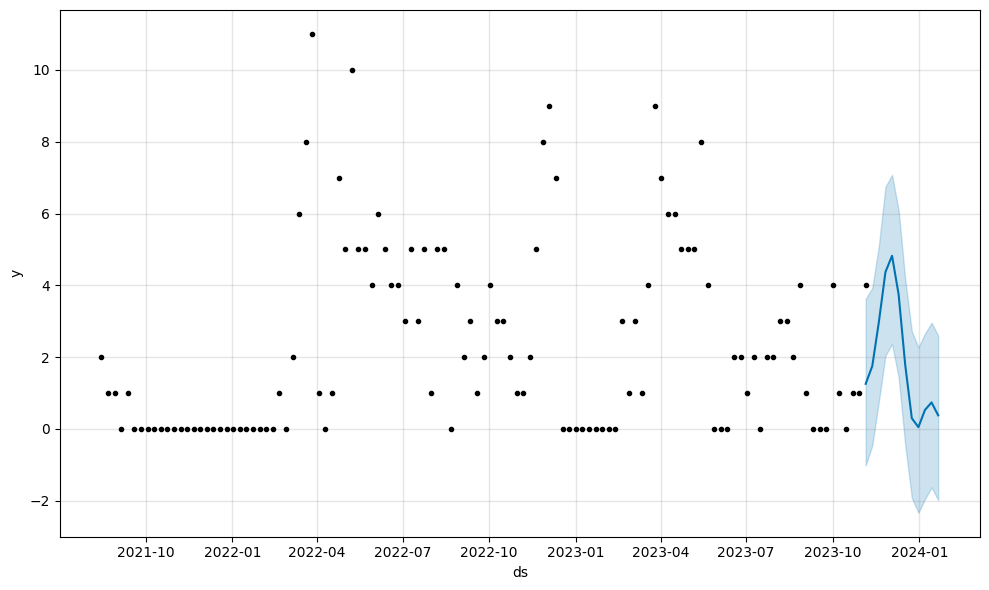

In [186]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
model.fit(df)
df = df.set_index('ds')
prediction=model.predict(future_dates)
model.plot(prediction)
df_prediction = model.predict(future_dates)
df.columns = ['df']

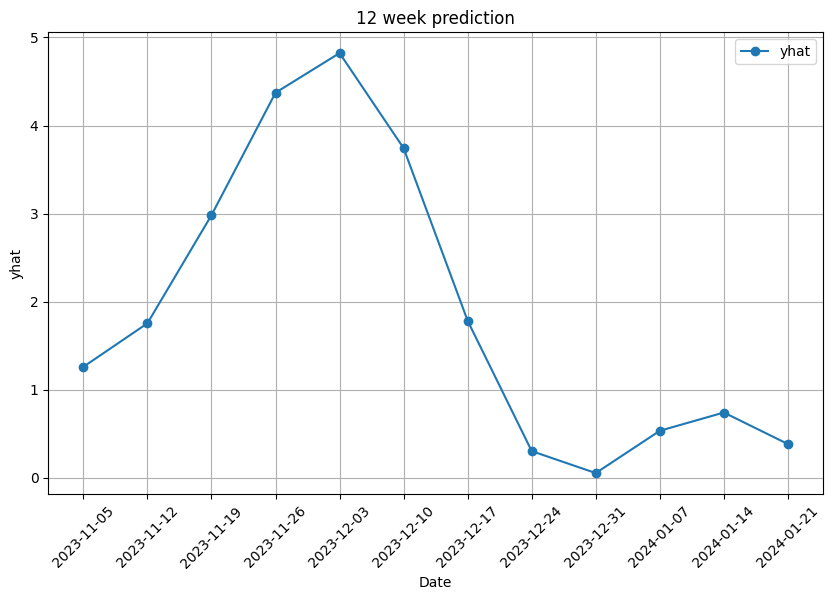

12.34925644563953

In [187]:
pred = prediction[['ds','yhat','yhat_upper']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()
sum(pred[4:]["yhat"])

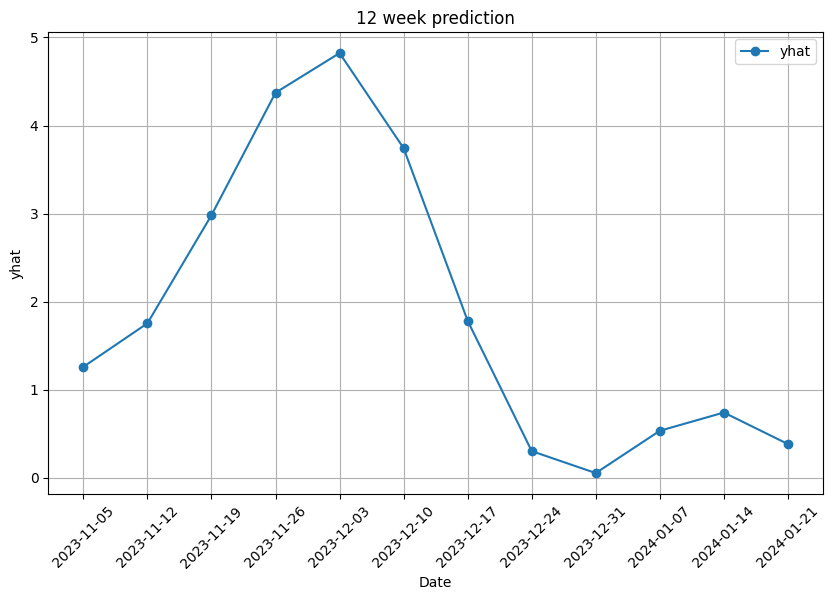

In [110]:
pred = prediction[['ds','yhat']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3146780253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3146780253.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
19:33:50 - cmdstanpy - INFO - Chain [1] start processing
19:33:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 3.063827985191055
Root Mean Squared Error (RMSE): 1.7503793832169798
Squared Difference between yhat and 11461:
0     0.513980
1     2.629119
2     3.016186
3     3.316244
4     4.688208
5     0.820758
6     3.962746
7     0.617933
8     0.030996
9    11.042110
dtype: float64
Mean Absolute Error (MAE): 1.52
Mean Absolute Percentage Error (MAPE): inf%
Root Mean Squared Error (RMSE) Percentage: 43.76%
R-squared: -0.42


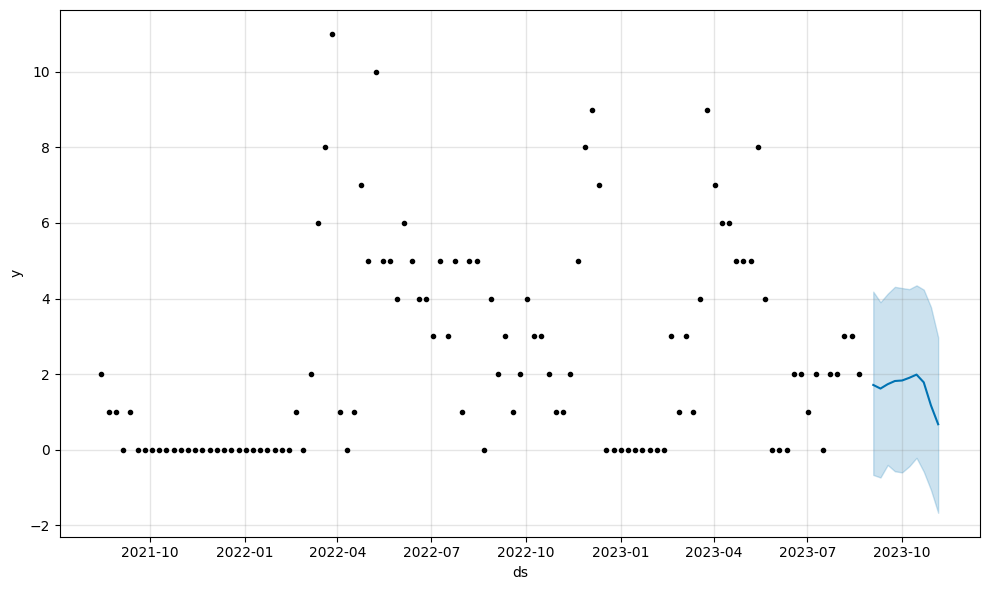

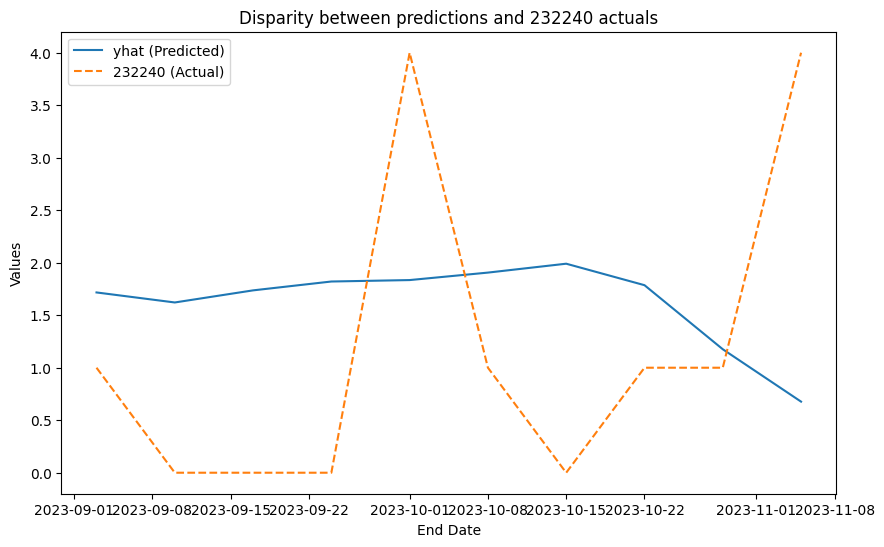

In [111]:
df = data_file[['End Date',232240]]
df_val = df[0:10]
val_dates = df_val['End Date']
val = pd.DataFrame(val_dates)
val.rename(columns={'End Date':'ds'},inplace=True)

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
dfv = df[11:]
model.fit(dfv)
df = df.set_index('ds')
prediction=model.predict(val)
model.plot(prediction)
df_prediction = model.predict(val)
df.columns = ['df']

df_pred = df_prediction[['ds','yhat']]
merged_df = pd.merge(df_pred, df_val, left_on='ds', right_on='End Date', how='inner')
import pandas as pd
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(merged_df['yhat'], merged_df[232240])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate squared difference between 'yhat' and '11461'
squared_difference = (merged_df['yhat'] - merged_df[232240])**2
print(f'Squared Difference between yhat and 11461:\n{squared_difference}')

import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(merged_df['yhat'] - merged_df[232240]))
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((merged_df['yhat'] - merged_df[232240]) / merged_df[232240])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


# Calculate the range of the target variable
target_range = merged_df[232240].max() - merged_df[232240].min()

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# Calculate RMSE as a percentage of the target variable's range
rmse_percentage = (rmse / target_range) * 100

print(f'Root Mean Squared Error (RMSE) Percentage: {rmse_percentage:.2f}%')

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(merged_df[232240], merged_df['yhat'])
print(f'R-squared: {r_squared:.2f}')

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a DataFrame called df
# If not, you can create one using pd.DataFrame(your_data)

# Extract relevant columns
dates = pd.to_datetime(merged_df['End Date'])
yhat_values = merged_df['yhat']
actual_values = merged_df[232240]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, yhat_values, label='yhat (Predicted)')
plt.plot(dates, actual_values, label='232240 (Actual)', linestyle='dashed')

# Adding labels and title
plt.xlabel('End Date')
plt.ylabel('Values')
plt.title('Disparity between predictions and 232240 actuals')
plt.legend()

# Display the plot
plt.show()



In [188]:
df = data_file[['End Date',292859]]

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
20:16:06 - cmdstanpy - INFO - Chain [1] start processing
20:16:06 - cmdstanpy - INFO - Chain [1] done processing


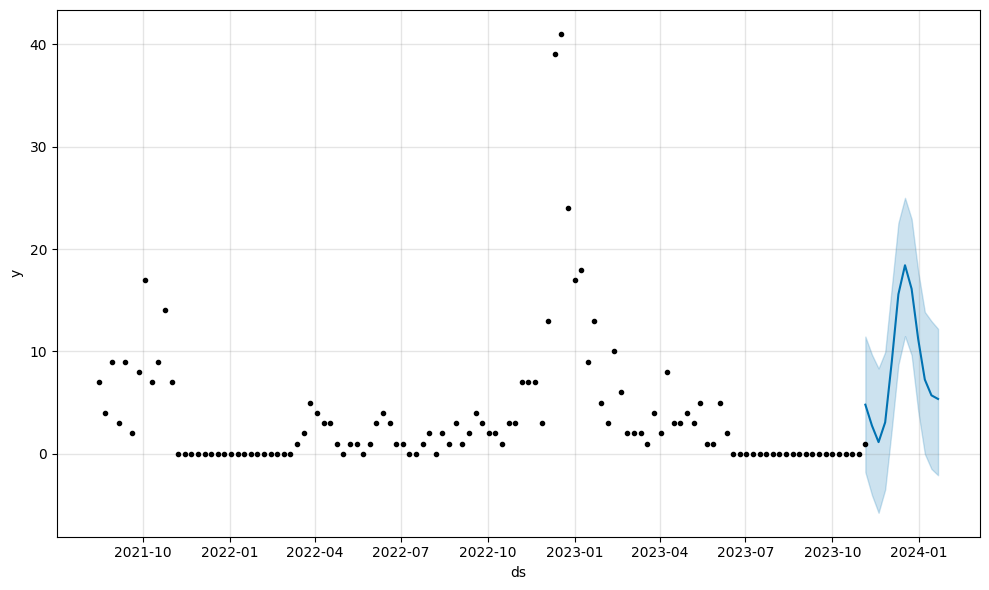

In [189]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
model.fit(df)
df = df.set_index('ds')
prediction=model.predict(future_dates)
model.plot(prediction)
df_prediction = model.predict(future_dates)
df.columns = ['df']

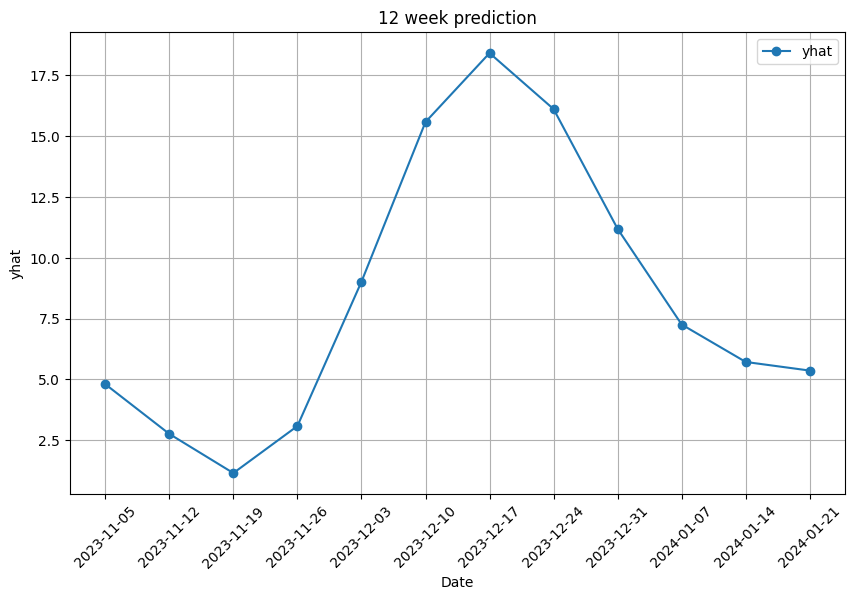

88.66118057179737

In [190]:
pred = prediction[['ds','yhat','yhat_upper']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()
sum(pred[4:]["yhat"])

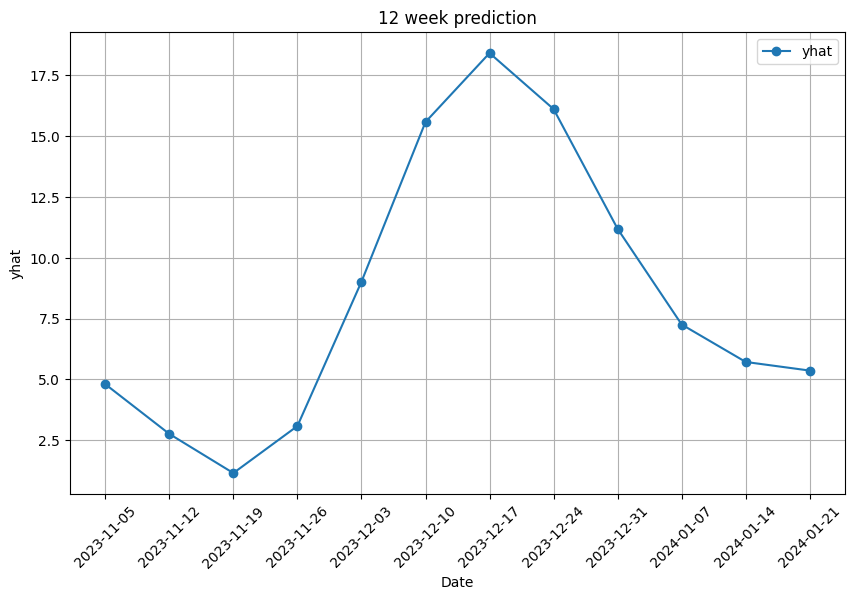

In [114]:
pred = prediction[['ds','yhat']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()

In [193]:
df = data_file[['End Date',300838]]

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
20:19:56 - cmdstanpy - INFO - Chain [1] start processing
20:19:56 - cmdstanpy - INFO - Chain [1] done processing


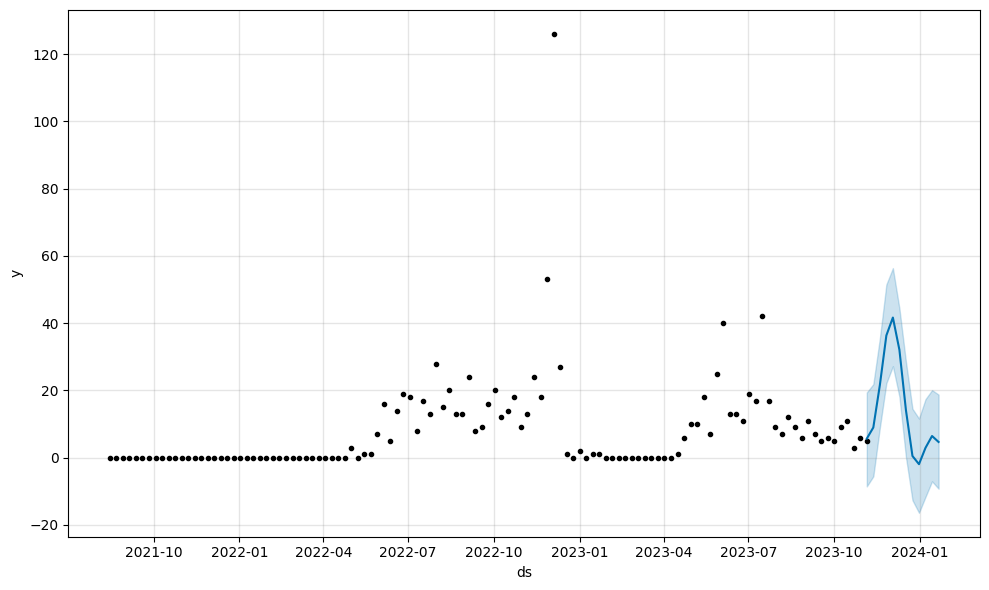

In [194]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
model.fit(df)
df = df.set_index('ds')
prediction=model.predict(future_dates)
model.plot(prediction)
df_prediction = model.predict(future_dates)
df.columns = ['df']

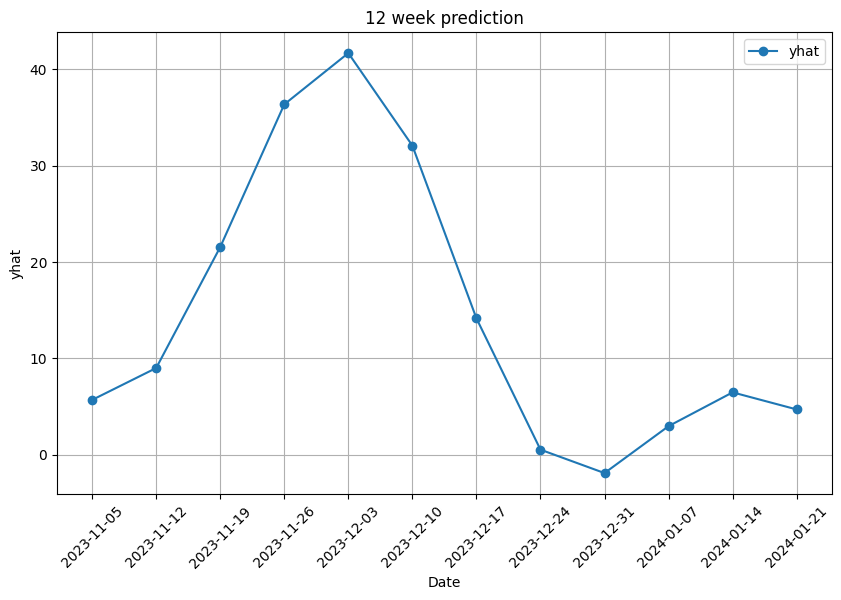

100.53760711159187

In [195]:
pred = prediction[['ds','yhat','yhat_upper']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()
sum(pred[4:]["yhat"])

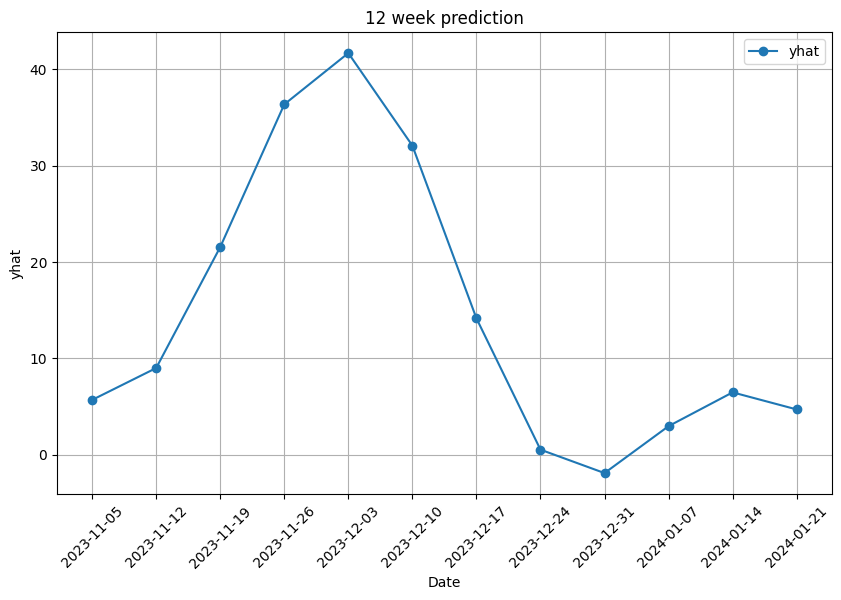

In [117]:
pred = prediction[['ds','yhat']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/2022341034.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/2022341034.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
19:33:51 - cmdstanpy - INFO - Chain [1] start processing
19:33:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 184.85885598624427
Root Mean Squared Error (RMSE): 13.59628096158079
Squared Difference between yhat and 11461:
0     71.477918
1    184.161617
2    267.993795
3    208.753315
4    194.765374
5    109.752903
6    121.365109
7    397.793056
8    184.997510
9    107.527962
dtype: float64
Mean Absolute Error (MAE): 13.22
Mean Absolute Percentage Error (MAPE): 243.35%
Root Mean Squared Error (RMSE) Percentage: 169.95%
R-squared: -27.18


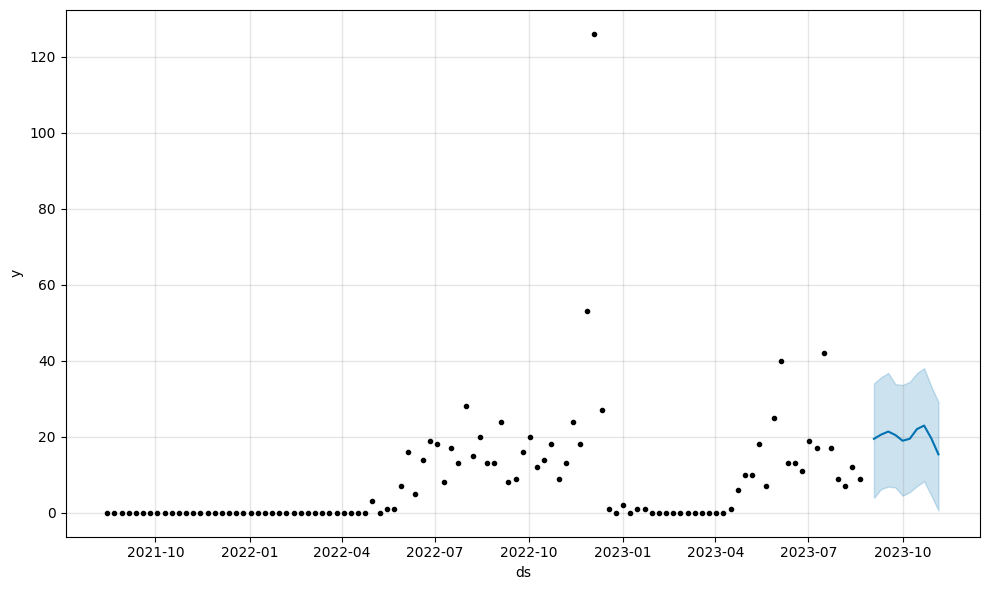

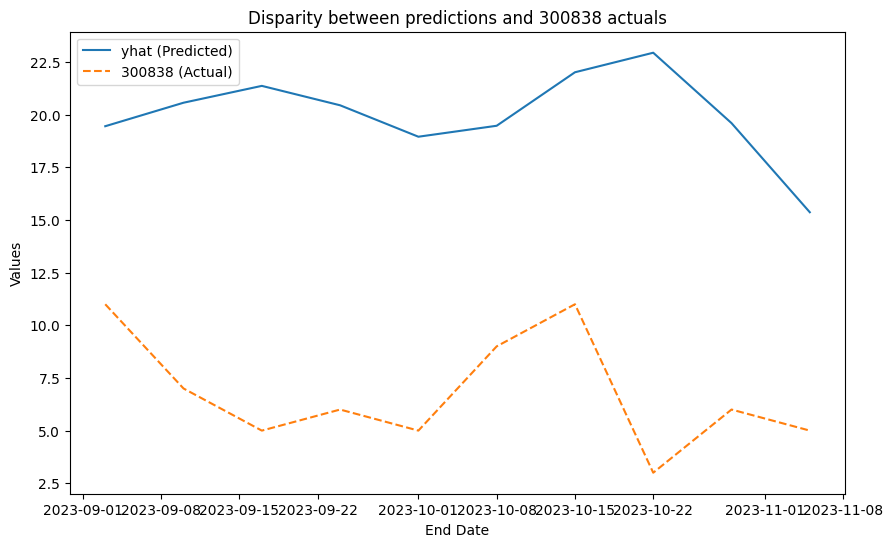

In [118]:
df = data_file[['End Date',300838]]
df_val = df[0:10]
val_dates = df_val['End Date']
val = pd.DataFrame(val_dates)
val.rename(columns={'End Date':'ds'},inplace=True)

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
dfv = df[11:]
model.fit(dfv)
df = df.set_index('ds')
prediction=model.predict(val)
model.plot(prediction)
df_prediction = model.predict(val)
df.columns = ['df']

df_pred = df_prediction[['ds','yhat']]
merged_df = pd.merge(df_pred, df_val, left_on='ds', right_on='End Date', how='inner')
import pandas as pd
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(merged_df['yhat'], merged_df[300838])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate squared difference between 'yhat' and '11461'
squared_difference = (merged_df['yhat'] - merged_df[300838])**2
print(f'Squared Difference between yhat and 11461:\n{squared_difference}')

import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(merged_df['yhat'] - merged_df[300838]))
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((merged_df['yhat'] - merged_df[300838]) / merged_df[300838])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


# Calculate the range of the target variable
target_range = merged_df[300838].max() - merged_df[300838].min()

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# Calculate RMSE as a percentage of the target variable's range
rmse_percentage = (rmse / target_range) * 100

print(f'Root Mean Squared Error (RMSE) Percentage: {rmse_percentage:.2f}%')

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(merged_df[300838], merged_df['yhat'])
print(f'R-squared: {r_squared:.2f}')

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a DataFrame called df
# If not, you can create one using pd.DataFrame(your_data)

# Extract relevant columns
dates = pd.to_datetime(merged_df['End Date'])
yhat_values = merged_df['yhat']
actual_values = merged_df[300838]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, yhat_values, label='yhat (Predicted)')
plt.plot(dates, actual_values, label='300838 (Actual)', linestyle='dashed')

# Adding labels and title
plt.xlabel('End Date')
plt.ylabel('Values')
plt.title('Disparity between predictions and 300838 actuals')
plt.legend()

# Display the plot
plt.show()



In [119]:
df = data_file[['End Date',11461]]

In [196]:
data_file

,Year,11461,83019,97696,105324,193895,194533,232240,292859,300838,Start Date,End Date
0,2023,20,19,4,2,2,4,4,1,5,2023-10-30,2023-11-05
1,2023,14,11,7,1,2,3,1,0,6,2023-10-23,2023-10-29
2,2023,15,14,1,3,1,12,1,0,3,2023-10-16,2023-10-22
3,2023,53,41,5,0,1,23,0,0,11,2023-10-09,2023-10-15
4,2023,8,16,4,1,4,6,1,0,9,2023-10-02,2023-10-08
...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021,1,0,12,4,5,0,1,9,0,2021-09-06,2021-09-12
113,2021,1,0,7,1,2,0,0,3,0,2021-08-30,2021-09-05
114,2021,1,0,6,2,2,0,1,9,0,2021-08-23,2021-08-29
115,2021,1,0,6,1,1,0,1,4,0,2021-08-16,2021-08-22


/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3521760682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
19:33:51 - cmdstanpy - INFO - Chain [1] start processing


19:33:51 - cmdstanpy - INFO - Chain [1] done processing


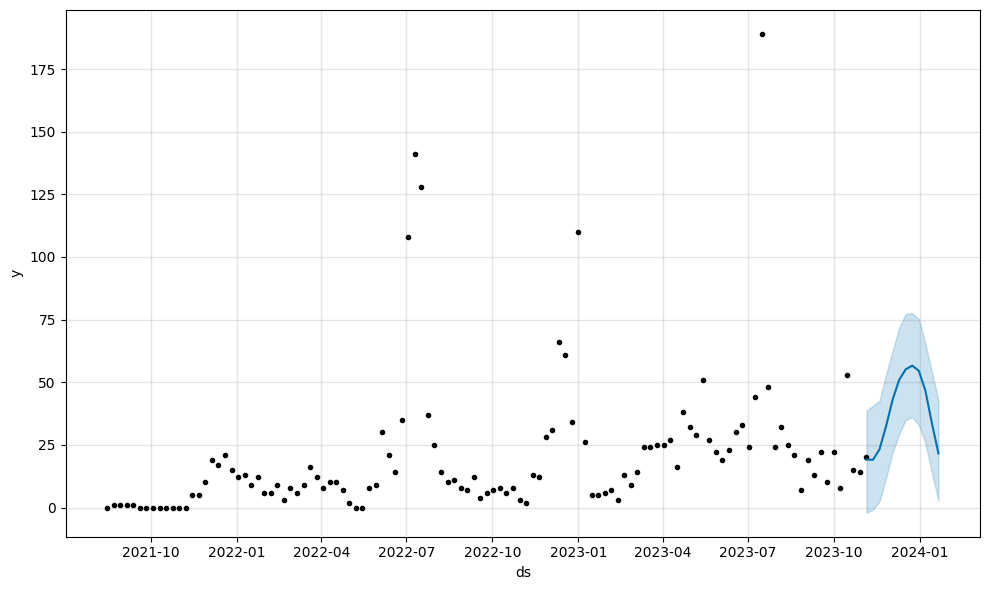

In [120]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet()
df.dropna(axis=0,inplace=True)
model.fit(df)
df = df.set_index('ds')
prediction=model.predict(future_dates)
model.plot(prediction)
df_prediction = model.predict(future_dates)
df.columns = ['df']

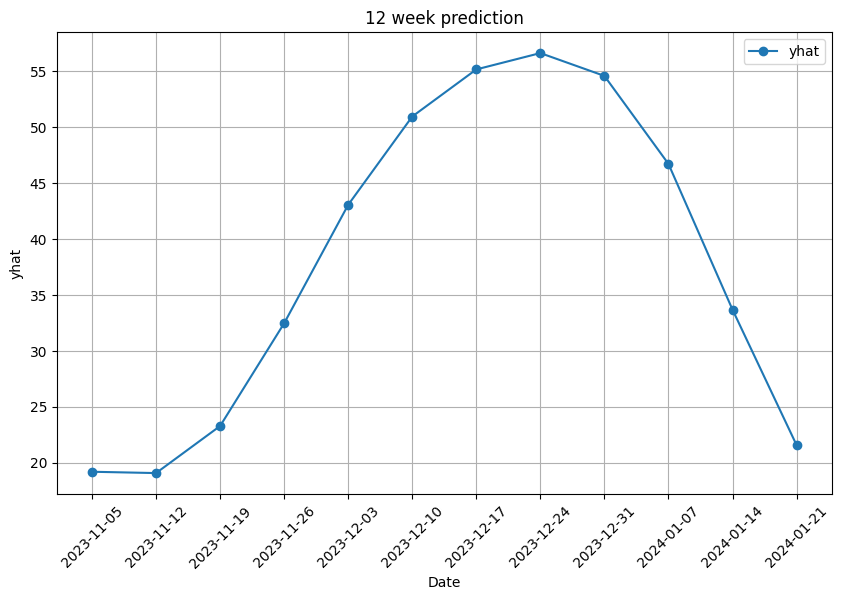

In [121]:
pred = prediction[['ds','yhat']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pred['ds'], pred['yhat'], marker='o', label='yhat')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('12 week prediction')
plt.legend()
plt.grid(True)

# Set X-axis ticks for every date
plt.xticks(pred['ds'], rotation=45)  # Adjust rotation if needed

plt.show()

In [122]:
pred

,ds,yhat
0,2023-11-05,19.180156
1,2023-11-12,19.061527
2,2023-11-19,23.270829
3,2023-11-26,32.460070
4,2023-12-03,43.054258
5,2023-12-10,50.950440
6,2023-12-17,55.161647
7,2023-12-24,56.623153
8,2023-12-31,54.581235
9,2024-01-07,46.712618


In [123]:
df.reset_index(inplace=True)
df.sort_values("ds", inplace=True)
plotdf = df.rename(columns={'ds':'Date', 'df':'Sales'})
arima_forecast['SKU 11461']
arima_forecast['ds'] = pred['ds']

/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3485418252.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred['ds'] = pd.to_datetime(pred['ds'])
/var/folders/vm/3kbc70c10gn36lc36vj2w2rw0000gn/T/ipykernel_11034/3485418252.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred.rename(columns={'yhat': 'Prophet'}, inplace=True)


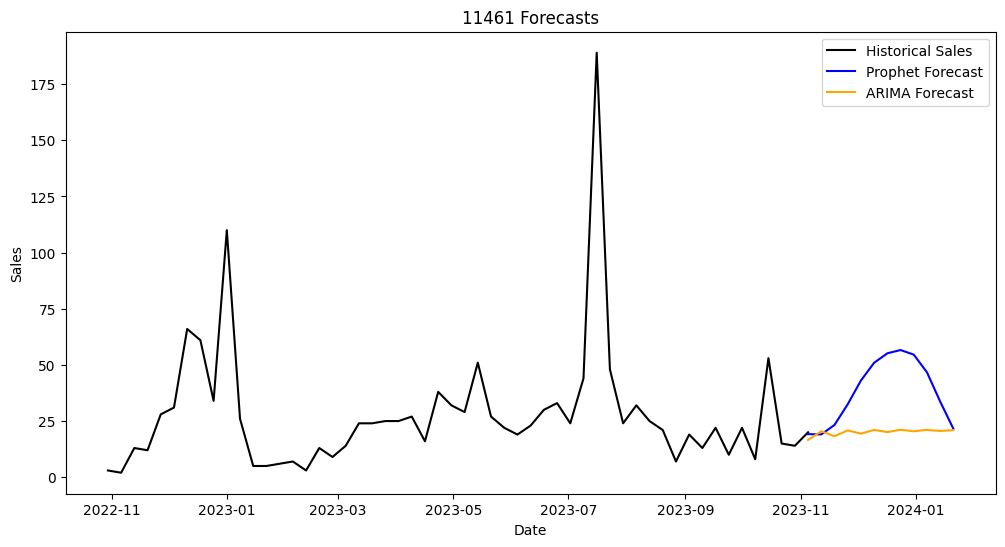

In [124]:
df.reset_index(inplace=True)
df.sort_values("ds", inplace=True)
plotdf = df.rename(columns={'ds':'Date', 'df':'Sales'})
arima_forecast['SKU 11461']
arima_forecast['ds'] = pred['ds']
pred['ds'] = pd.to_datetime(pred['ds'])
pred.rename(columns={'yhat': 'Prophet'}, inplace=True)

arima_forecast['ds'] = pd.to_datetime(arima_forecast['ds'])

# Merging the Prophet and ARIMA forecasts
combined_forecast = pd.merge(pred, arima_forecast, on='ds', how='outer')
combined_forecast.rename(columns={'SKU 11461': 'ARIMA'}, inplace=True)

plotdf['Date'] = pd.to_datetime(plotdf['Date'])

# Merging with the historical data
full_data = pd.concat([plotdf, combined_forecast], sort=False).reset_index(drop=True)

full_data = full_data[63:]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(full_data['Date'], full_data['Sales'], label='Historical Sales', color='black')
plt.plot(full_data['ds'], full_data['Prophet'], label='Prophet Forecast', color='blue')
plt.plot(full_data['ds'], full_data['ARIMA'], label='ARIMA Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('11461 Forecasts')
plt.legend()
plt.show()

In [125]:
full_data.shape

(66, 14)

In [126]:
full_data = full_data[63:]

In [127]:
full_data

,index,Date,Sales,ds,Prophet,ARIMA,SKU 83019,SKU 97696,SKU 105324,SKU 193895,SKU 194533,SKU 232240,SKU 292859,SKU 300838
126,NaN,2024-01-08,NaN,2024-01-07,46.712618,21.06,23.155751,3.810853,0.528244,1.556254,14.560530,2.351498,3.452223,7.807269
127,NaN,2024-01-15,NaN,2024-01-14,33.680575,20.59,23.063611,3.809217,0.325743,1.499592,14.204828,2.349894,3.521978,7.841002
128,NaN,2024-01-22,NaN,2024-01-21,21.569717,20.96,23.157037,3.808121,0.454991,1.837208,13.944040,2.348617,3.560772,7.874361
